Librerias que se utilizaran en las etapas de : Compresion de Datos y Preparacion de datos

In [5]:
#Librerias que se usaran
import pandas as pd  # Libreria para administrar tablas, y realizar trabajos con distintas formas de tablas o dataframes
import numpy as np   # Libreria para poder hacer operaciones matematicas y matriciales
import matplotlib.pyplot as plt # Libreria para realizar graficos 
from tabulate import tabulate   # Permite formatear y mostrar de mejor manera los datos tabulares
import seaborn as sns  # Libreria para realizar graficos y vizualizaciones
import psycopg2        # Libreria que permite la conexion con PostgresSQL
from matplotlib.backends.backend_pdf import PdfPages   # Libreria que permite exportar graficos en pdf

Se definen los parametros que nos ayudaran a conectar a la BD Posgresql alojado en el servidor de Azure

In [ ]:
# Información de la conexión a PostgressAzure DB
host = "controlsenesedb.postgres.database.azure.com"  # Nombre de la conexion a la base de datos
database = "ControlSenseDB"  # Nombre de la base de datos
user = "postgres"      # Nombre de usuario
password = "Larc0mar"  # Contraseña de la base de datos

Establecemos la conexion con el servidor de Azure, y extraemos datos de Posgresql, que utilizaremos en el analisis

In [ ]:
# Establece la conexión a la base de datos PostgreSQL
try:
    connection = psycopg2.connect(
        host=host,
        database=database,
        user=user,
        password=password
    )

    # Query SQL para seleccionar datos en lenguaje SQL
    sql_query = "Select * from public.tp_cargadescarga"
 
    # Utiliza Pandas para ejecutar la consulta SQL y cargar los resultados en un DataFrame
    df = pd.read_sql_query(sql_query, connection)
    
    # Cierra la conexión a la base de datos
    connection.close()
    
    # Ahora puedes trabajar con los datos en el DataFrame 'df'
    print(df.head())  # Imprime las primeras filas del DataFrame

except psycopg2.Error as e:
    print("Error al conectar a la base de datos PostgreSQL:", e)

Una vez que se hayan extraido los datos del BD Postgresql, se considera una buena practica guardar los datos 
en un archivo plano con un .csv para que la carga se mas rapida posteriormente

In [ ]:
#Se guardaron los datos que fueron traidos de AZURE POSTGRESS
#df.to_csv('datos_CicloAcarreo.csv', index=False)

# **1. Comprensión de los Datos**

### *1.1 Cargamos los datos para realizar la comprension y preparacion de datos*

In [6]:
#Cargamos los datos ya almacenados en el csv, para no conectar de nuevo al Azure DataBase(Duracion 15 min)
# Leer desde el csv solo tomara 1 min
datos = pd.read_csv('datos_CicloAcarreo.csv')
# Dimension de los datos ()
datos.head(3)

C:\Users\BryanInche-MS4M\AppData\Local\Temp\ipykernel_19276\2138302887.py:3: DtypeWarning: Columns (20,21,57,65) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv('datos_CicloAcarreo.csv')


id  id_cargadescarga  id_equipo  id_trabajador  id_palas  id_palanext  \
0   7020              7020         33           26.0      9891           72   
1  30070             30070         36          116.0     41191          108   
2   2633              2633         35           76.0      2696          105   

   id_trabajadordescarga                      tiem_llegada tiem_cuadra  \
0                    NaN  2019-01-06 15:10:50.685000+00:00         NaN   
1                    NaN  2019-03-12 14:31:43.910000+00:00         NaN   
2                    NaN  2018-12-01 19:52:12.782575+00:00         NaN   

  tiem_cuadrado  ... user_edit user_eliminate is_report is_fixed ticket guia  \
0           NaN  ...       NaN            NaN       NaN      NaN    NaN  NaN   
1           NaN  ...       NaN            NaN       NaN      NaN    NaN  NaN   
2           NaN  ...       NaN            NaN       NaN      NaN    NaN  NaN   

   origen_tracking  efh_factor_loaded  efh_factor_empty  tonelajevims_v  
0              NaN                NaN               NaN             NaN  
1              NaN                NaN               NaN             NaN  
2              NaN                NaN               NaN             NaN  

[3 rows x 84 columns]

<font color="red">PASO OPCIONAL:</font>

<font color="red">Renombramos los nombres de las variables para un mejor analisis
- Al momento de renombrar las variables, tener en cuenta que no se repitan los nombres de las variables</font>

In [7]:
import pandas as pd

# Define un diccionario con los nuevos nombres de las columnas solo para algunas columnas
nuevos_nombres = {
    'tiem_llegada': 'tiempo_llegada_camion','tiem_cuadra': 'tiempo_cuadra_camion','tiem_cuadrado': 'tiempo_cuadrado_camion' , 'tiem_carga' : 'tiempo_cargar_al_camion', 
    'tiem_acarreo' : 'tiempo_acarreo_camion', 'tiem_cola': 'tiempo_cola_camion_en_zonadescarga','tiem_retro': 'tiempo_retroceso_para_descargar',
    'tiem_descarga': 'tiempo_descarga_camion', 
    'tiem_viajando': 'tiempo_viajando_a_locacion', 'tonelaje':'tonelaje_nominal','tonelajevims':'tonelajex10_segun_computadora', 'yn_estado': 'cambios_estado',
    'efhcargado': 'distancia_recorrida_camioncargado_cm', 
    'efhvacio': 'distancia_recorrida_camionvacio_cm', 'distrealcargado': 'distancia_recorrida_camioncargado_cm_gps', 
    'distrealvacio': 'distancia_recorrida_camionvacio_cm_gps' ,'coorxdesc': 'coordenada_x_descarga_cm', 
    'coorydesc': 'coordenada_y_descarga_cm' , 'coorzdesc': 'coordenada_z_descarga_cm', 'tipodescargaidentifier': 'tipo_descarga', 
    'tonelajevvanterior': 'tonelaje_camion_viajevacio_cicloanterior_vims', 'tonelajevvposterior': 'tonelaje_camion_viajevacio_cicloactual_vims', 
    'dumpreal': 'actividad_descargando_campo_o_no', 'loadreal': 'actividad_cargando_campo_o_no', 'tiem_creac': 'tiempocreacionregistro',
    'tiem_update': 'tiempoactualizacionregistro', 'velocidadvimscargado': 'promedio_velocidad_camioncargado_km/hrx1000_comp', 
    'velocidadvimsvacio': 'promedio_velocidad_camionvacio_km/hrx1000_comp',
    'velocidadgpscargado':'promedio_velocidad_camioncargado_km/hrx1000_gps', 'velocidadgpsvacio': 'promedio_velocidad_camionvacio_km/hrx1000_gps', 
    'tonelajevimsretain': 'tonelaje_camion_antes_cargaestabilizada','nivelcombuscargado': 'porcentaje_combustible_camioncargado', 
    'nivelcombusdescargado':'porcentaje_combustible_camiondescargando',
    'llegadareal': 'actividad_llegada_campo_o_no','cuadrareal': 'actividad_cuadrando_campo_o_no' , 'cuadradoreal': 'actividad_cuadrado_campo_o_no', 
    'acarreoreal': 'actividad_acarreando_campo_o_no', 'colareal': 'actividad_cola_en_descarga_campo_o_no', 'retroreal': 'actividad_retroceso_campo_o_no',
    'viajandoreal': 'actividad_viajandovacio_campo_o_no', 'volumen': 'volumen_capacidad', 'aplicafactor_vol': 'aplica_factor_volumen_o_tonelaje', 'tiem_listo': 'tiempo_camion_listo_descargar',
    'listoreal': 'actividad_listo_para_descarga_campo_o_no', 'coorzniveldescarga': 'nivel_descarga_cm', 
    'tiem_esperando': 'tiempo_esperando_camion_en_locacion', 'esperandoreal': 'actividad_esperado_en_locacion_campo_o_no' 
}

# Renombra las columnas del DataFrame
datos = datos.rename(columns=nuevos_nombres)
datos.head(3)

id  id_cargadescarga  id_equipo  id_trabajador  id_palas  id_palanext  \
0   7020              7020         33           26.0      9891           72   
1  30070             30070         36          116.0     41191          108   
2   2633              2633         35           76.0      2696          105   

   id_trabajadordescarga             tiempo_llegada_camion  \
0                    NaN  2019-01-06 15:10:50.685000+00:00   
1                    NaN  2019-03-12 14:31:43.910000+00:00   
2                    NaN  2018-12-01 19:52:12.782575+00:00   

  tiempo_cuadra_camion tiempo_cuadrado_camion  ... user_edit user_eliminate  \
0                  NaN                    NaN  ...       NaN            NaN   
1                  NaN                    NaN  ...       NaN            NaN   
2                  NaN                    NaN  ...       NaN            NaN   

  is_report is_fixed ticket guia  origen_tracking  efh_factor_loaded  \
0       NaN      NaN    NaN  NaN              NaN                NaN   
1       NaN      NaN    NaN  NaN              NaN                NaN   
2       NaN      NaN    NaN  NaN              NaN                NaN   

   efh_factor_empty  tonelajevims_v  
0               NaN             NaN  
1               NaN             NaN  
2               NaN             NaN  

[3 rows x 84 columns]

Configuramos pandas para que podamos vizualizar todas las columnas y filas la estadistica descriptiva de todas las variables

In [8]:
#Configuramos pandas para que podamos vizualizar todas las columnas y filas la estadistica descriptiva de todas las variables
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
#Configuramos pandas para que lanze valores con una precision de hasta 6 decimales
pd.set_option('display.float_format', '{:.6f}'.format)
# Restaurar la configuración predeterminada
#pd.set_option('display.float_format', None) 

***Preguntas:***
- <font color="yellow">Las variables de tonelajevvanterior(tonelaje_camion_viajevacio_cicloanterior_vims) y 
tonelajevvposterior(tonelaje_camion_viajevacio_cicloactual_vims), hacen referencia a camion viajando vacio. Entonces el tonelaje a que hace referencia? A la capacidad que tiene el 
camion o lo que lleva cargado en la tolva?
- Descripcion de las siguientes variables 'is_fixed', 'efh_factor_loaded','efh_factor_empty?
- Si una actividad no viene de Campo, entonces de donde vendria? Como se entiende esta variable?</font>

### *1.2 Obtenemos la dimension de los datos*
- Identificaremos la cantidad de filas y columnas que tienen nuestros datos

In [9]:
import plotly.express as px

# Obtiene las dimensiones de tu conjunto de datos
num_filas, num_columnas = datos.shape

# Crea un DataFrame con los datos de las dimensiones
df_dimension = pd.DataFrame({'Dimensión': ['Filas', 'Columnas'], 'Valor': [num_filas, num_columnas]})

# Crea un gráfico de pastel interactivo con etiquetas
fig = px.pie(df_dimension, names='Dimensión', values='Valor', title='Dimensiones del Conjunto de Datos')

# Agrega etiquetas y porcentajes
fig.update_traces(textinfo='label+percent')

# Muestra el gráfico interactivo
fig.show()

### *1.3 Identificacion de Variables Categoricas y Numericas*
- Pasaremos a identificar cuantas variables de nuestros datos son numericas y cuantas categoricas

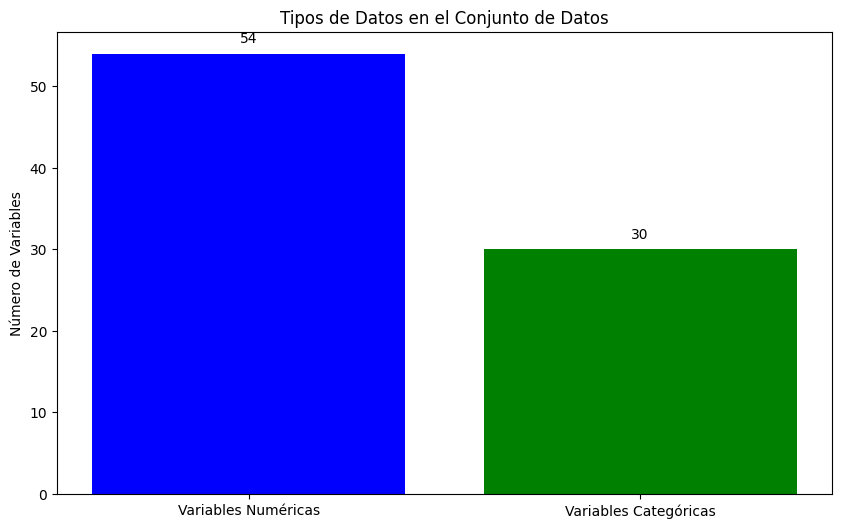

In [10]:
import matplotlib.pyplot as plt

# Verificamos que tipos de datos estaremos trabajando para el análisis
tipos_de_datos = datos.dtypes

variables_numericas = tipos_de_datos[tipos_de_datos != 'object']
variables_categoricas = tipos_de_datos[tipos_de_datos == 'object']

# Obtiene la cantidad de variables numéricas y categóricas
num_variables_numericas = len(variables_numericas)
num_variables_categoricas = len(variables_categoricas)

# Etiquetas para las categorías
categorias = ['Variables Numéricas', 'Variables Categóricas']

# Valores para las categorías
valores = [num_variables_numericas, num_variables_categoricas]

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(categorias, valores, color=['blue', 'green'])

# Añade etiquetas en las barras
for bar, valor in zip(bars, valores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(valor), ha='center', va='bottom')

# Añade etiquetas y título
plt.ylabel('Número de Variables')
plt.title('Tipos de Datos en el Conjunto de Datos')

# Muestra el gráfico
plt.show()

Tambien identificamos cuales serian esas Variables Categoricas y numericas

In [11]:
import pandas as pd
import plotly.express as px

# Supongamos que tienes un DataFrame llamado 'datos'
tipos_de_datos = datos.dtypes

variables_numericas = tipos_de_datos[tipos_de_datos != 'object']
variables_categoricas = tipos_de_datos[tipos_de_datos == 'object']

# Crea un DataFrame con nombres de variables y tipos de datos
df = pd.DataFrame({'Variable': datos.columns, 'Tipo de Dato': ['Numérica' if col in variables_numericas else 'Categórica' for col in datos.columns]})

# Crea un gráfico interactivo
fig = px.bar(df, x='Variable', color='Tipo de Dato', title='Tipos de Variables')
fig.show()

### *1.4 Identificacion de Valores Nulos*
- Pasaremos a identificar si en nuestros datos tenemos valores Nulos, y si fuese el caso, cuanto porcentaje de valores Nulos tendrian cada variable del Dataset

C:\Users\BryanInche-MS4M\AppData\Local\Temp\ipykernel_19276\2682086575.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




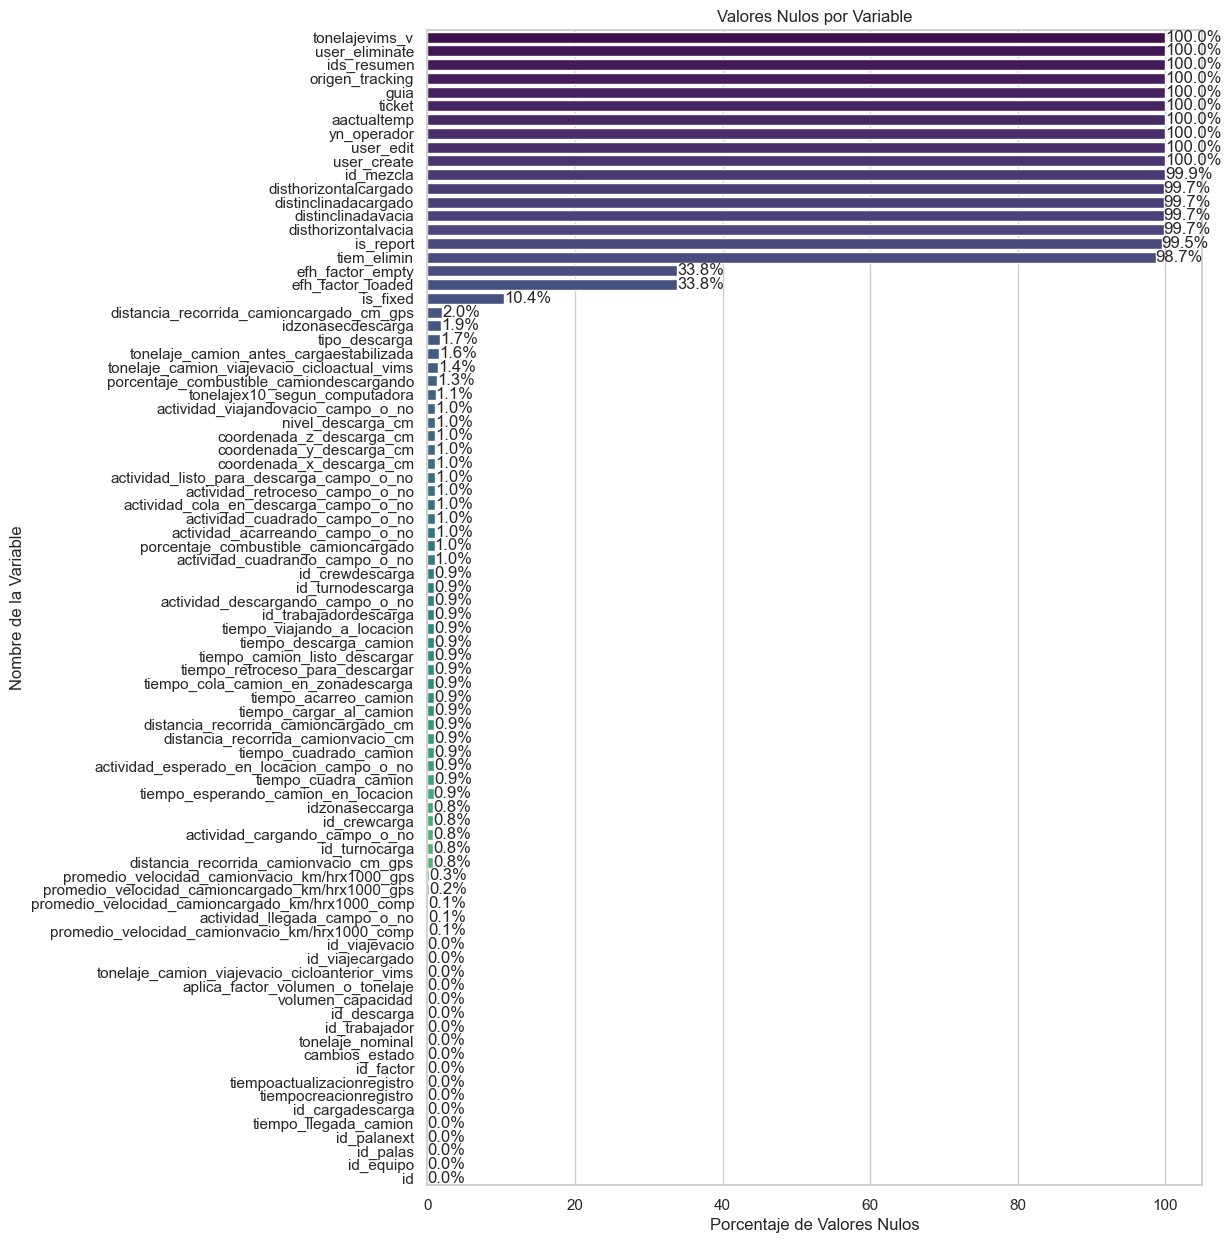

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado datos
valores_nulos = datos.isnull().sum()
valores_nulos_ordenados = valores_nulos.sort_values(ascending=False)
porcentaje_nulos = (valores_nulos_ordenados / len(datos)) * 100

# Crear un DataFrame con tres columnas: "Nombre de la Variable", "Valores Nulos", y "Porcentaje de Nulos"
df_valores_nulos = pd.DataFrame({'Nombre de la Variable': valores_nulos_ordenados.index,
                                 'Valores Nulos': valores_nulos_ordenados,
                                 'Porcentaje de Nulos': porcentaje_nulos})

# Ordena el DataFrame por la cantidad de valores nulos
df_valores_nulos = df_valores_nulos.sort_values(by='Valores Nulos', ascending=False)

# Grafico de barras horizontales ordenado por la cantidad de valores nulos con etiquetas de porcentaje
plt.figure(figsize=(10, 15))
sns.set(style="whitegrid")
ax = sns.barplot(x="Porcentaje de Nulos", y="Nombre de la Variable", data=df_valores_nulos, palette="viridis", orient="h")
plt.title("Valores Nulos por Variable")
plt.xlabel("Porcentaje de Valores Nulos")
plt.ylabel("Nombre de la Variable")

# Agrega etiquetas de porcentaje a las barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.1f}%', ha='left', va='center')

plt.show()

# **2. PREPARACION DE DATOS**

### *2.1 TRATAMIENTO DE VALORES NULOS*
- Una vez que ya hemos identificado los valores Nulos pasaremos a tratarlos acontinuacion:

1. Se eliminan las columnas(variables) con mas del 90% de Nulos en sus datos. Esto debido a que con ese porcentaje 
de valores Nulos, no aportan informacion necesaria para hacer el analisis de datos.

In [13]:
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > 90].index
datos = datos.drop(columnas_a_eliminar, axis=1)

2. En las variables donde tenemos un porcentaje de Valores Nulos, se completaran con 0s porque esto favorecera 
al momento de analizar los datos por vizualizacion, y al mismo tiempo no perderemos informacion, lo que si sucederia si 
eliminamos los valores nulos, y esto eliminaria los registros con los valores nulos, y esto haria que tuviesemos menos datos
para analizar

In [14]:
# Rellenar los valores nulos con ceros en todo el DataFrame
datos = datos.fillna(0)

Verificamos que ya hemos solucionado el problema de valores Nulos

C:\Users\BryanInche-MS4M\AppData\Local\Temp\ipykernel_19276\3680571665.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




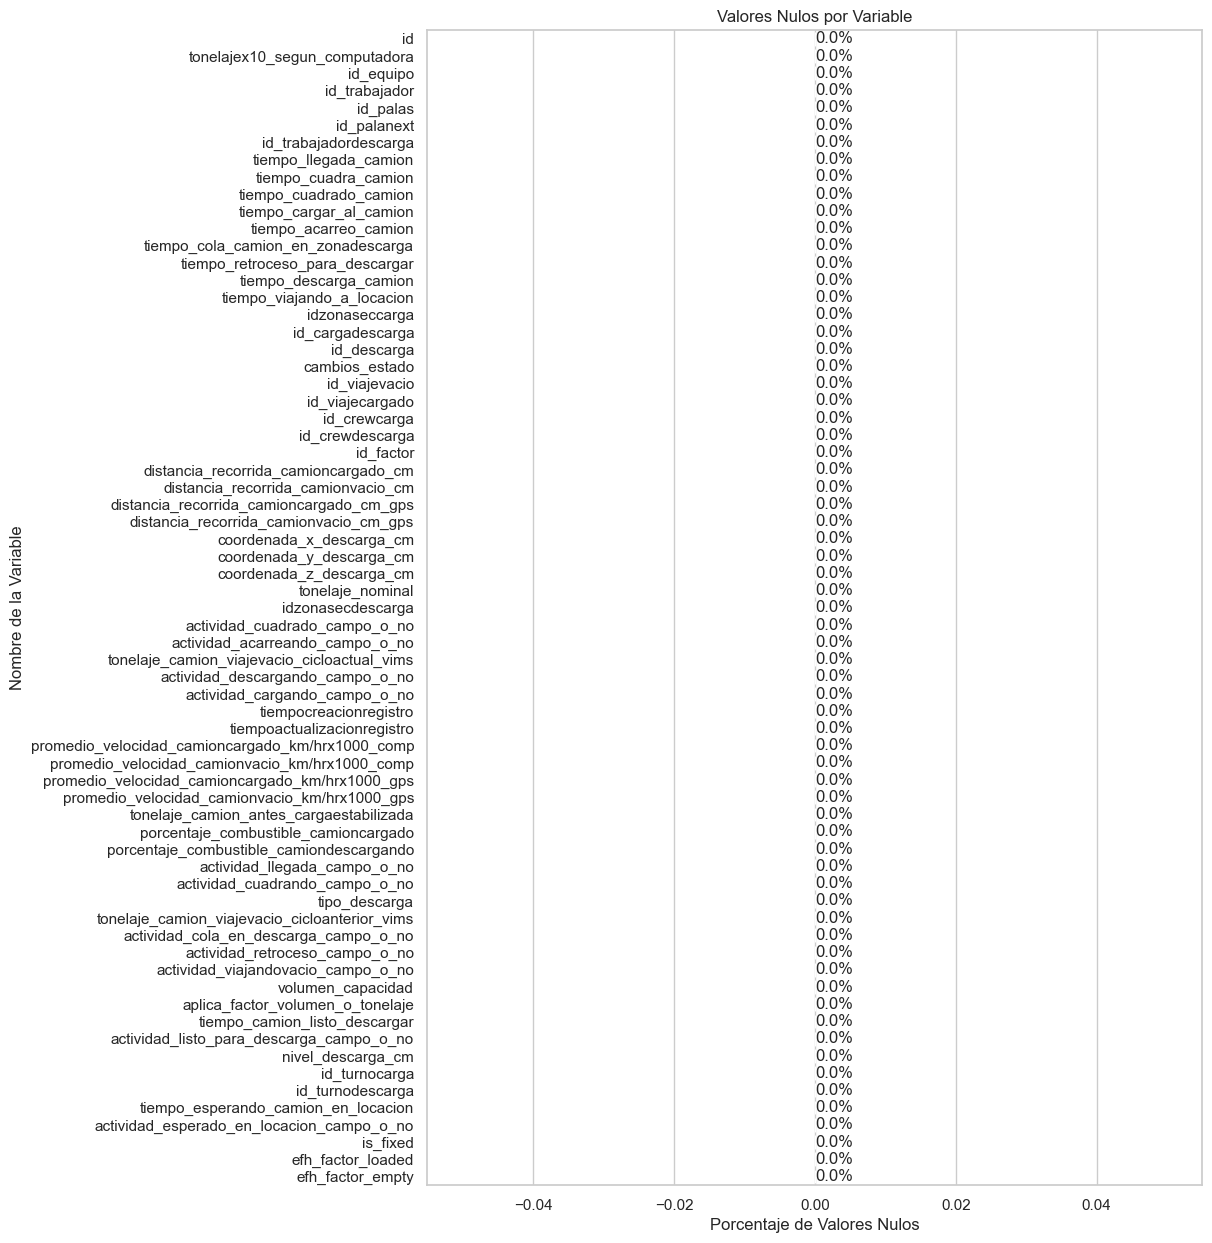

In [15]:

valores_nulos = datos.isnull().sum()
valores_nulos_ordenados = valores_nulos.sort_values(ascending=False)
porcentaje_nulos = (valores_nulos_ordenados / len(datos)) * 100

# Crear un DataFrame con tres columnas: "Nombre de la Variable", "Valores Nulos", y "Porcentaje de Nulos"
df_valores_nulos = pd.DataFrame({'Nombre de la Variable': valores_nulos_ordenados.index,
                                 'Valores Nulos': valores_nulos_ordenados,
                                 'Porcentaje de Nulos': porcentaje_nulos})

# Ordena el DataFrame por la cantidad de valores nulos
df_valores_nulos = df_valores_nulos.sort_values(by='Valores Nulos', ascending=False)

# Grafico de barras horizontales ordenado por la cantidad de valores nulos con etiquetas de porcentaje
plt.figure(figsize=(10, 15))
sns.set(style="whitegrid")
ax = sns.barplot(x="Porcentaje de Nulos", y="Nombre de la Variable", data=df_valores_nulos, palette="viridis", orient="h")
plt.title("Valores Nulos por Variable")
plt.xlabel("Porcentaje de Valores Nulos")
plt.ylabel("Nombre de la Variable")

# Agrega etiquetas de porcentaje a las barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.1f}%', ha='left', va='center')

plt.show()

### *1.5 IDENTIFICACCION DE VALORES DUPLICADOS*

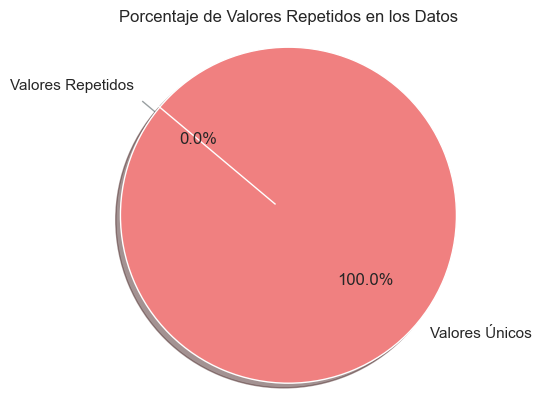

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'datos'
# Utiliza la función `duplicated` para marcar filas duplicadas
duplicados = datos[datos.duplicated(keep=False)]

# Luego, utiliza `groupby` para contar cuántas veces se repite cada fila duplicada
conteo_duplicados = duplicados.groupby(list(datos.columns)).size().reset_index(name='Cantidad')

# Filtra las filas que se repiten al menos 2 veces
conteo_duplicados = conteo_duplicados[conteo_duplicados['Cantidad'] >= 2]

# Calcular el porcentaje de valores repetidos
cantidad_filas_duplicadas = len(conteo_duplicados)
total_filas = len(datos)
porcentaje_repetidos = (cantidad_filas_duplicadas / total_filas) * 100

# Crear un gráfico de pastel
labels = ['Valores Únicos', 'Valores Repetidos']
sizes = [100 - porcentaje_repetidos, porcentaje_repetidos]
colors = ['lightcoral', 'lightblue']
explode = (0, 0.1)  # Destacar la porción de valores repetidos

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Asegurar que el gráfico sea un círculo

plt.title('Porcentaje de Valores Repetidos en los Datos')

plt.show()

# **2. PREPARACION DE DATOS**

### *2.2 Tratamiento de Valores Duplicados*

In [17]:
#datos = datos.drop_duplicates(inplace=True)

### *1.6 ANALISIS DE ESTADISTICA DESCRIPTIVA EN LOS DATOS*

Se analizan las medidas de tendencia central, donde tambien se consideran la desviacion estandar, cuantiles, media, max, min

In [18]:
import pandas as pd

# Supongamos que 'analisis_descriptivo_num' es el DataFrame resultante de tu análisis descriptivo
# Puedes personalizar las estadísticas que deseas mostrar
columnas_a_excluir = [col for col in datos.columns if col.startswith('id')]

# Selecciona solo las columnas que no comienzan con 'id'
columnas_incluidas = [col for col in datos.columns if col not in columnas_a_excluir] # Si no estan en columnas a excluir, entonces las incluyo en el analisis estadistico

analisis_descriptivo = datos[columnas_incluidas].describe()

# Estadísticas descriptivas a mostrar
estadisticas = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Selecciona las estadísticas deseadas
resumen_estadistico = analisis_descriptivo.loc[estadisticas]

# Transpone la tabla para que las estadísticas estén en filas y las columnas en columnas
resumen_estadistico = resumen_estadistico.T

# Muestra la tabla de estadísticas
print(resumen_estadistico)

                                                          count             mean              std             min              25%              50%              75%                 max
tonelaje_nominal                                 1714770.000000       228.799010         3.334844        0.000000       229.000000       229.000000       229.000000          230.000000
tonelajex10_segun_computadora                    1714770.000000      2285.362941       340.194212    -2565.000000      2257.000000      2333.000000      2404.000000         3750.000000
distancia_recorrida_camioncargado_cm             1714770.000000    385599.852818    211567.310243 -1204795.000000    240000.000000    345000.000000    501666.000000     61468000.000000
distancia_recorrida_camionvacio_cm               1714770.000000    506412.919427  88975708.560333 -2570745.000000    232000.000000    322777.000000    448000.000000 114767600000.000000
distancia_recorrida_camioncargado_cm_gps         1714770.000000    243200.5

**Definiciones:**  
*- Desviacion_Estandar : Cuanto mayor sea la desviación estándar, mayor será la variabilidad de los datos con respecto a la media. Si una variable tiene una desviación estándar significativamente más alta que otra, esto sugiere que los valores en esa variable están más dispersos y pueden estar más lejos de la media. También puede indicar la presencia de valores atípicos o extremos.*

***Preguntas del analisis de estadisticas descriptivas:***
- <font color="yellow"> Porque la variable tonelajevims(tonelajex10_segun_computadora), 
efhcargado(distancia_recorrida_camioncargado_cm), efhvacio(distancia_recorrida_camionvacio_cm), coorxdesc(coordenada_x_descarga_cm),coorydesc(coordenada_y_descarga_cm), tonelajevimsretain(tonelaje_camion_antes_cargaestabilizada), nivelcombuscargado(porcentaje_combustible_camioncargado), nivelcombusdescargado(porcentaje_combustible_camiondescargando)
  contine valor negativo como minimo, a que se debe esto?
- La desviacion porque es muy alta en esta variable tonelajevvanterior(tonelaje_camion_viajevacio_cicloanterior_vims), tonelajevvposterior(tonelaje_camion_viajevacio_cicloactual_vims)?
- La variable volumen(volumen_capacidad) , mantiene estadisticas constantes, a que se debe esto? </font>


### *1.7 Analisis de Histogramas*

**Definiciones:**  
- Eje horizontal (eje X): En el eje X, se representan los valores de la variable que estás analizando. Cada barra del histograma corresponde a un rango de valores.
- Eje vertical (eje Y): En el eje Y, se representa la frecuencia o densidad de ocurrencia de los valores en cada rango. La altura de las barras del histograma muestra cuántas veces los valores caen dentro de ese rango.
- Tendencia central: La ubicación de la "cima" o pico del histograma indica la tendencia central de los datos. 
- Dispersión: La dispersión se relaciona con la anchura de las barras del histograma. Cuanto más ancho sea el histograma, mayor será la dispersión de los datos. Cuanto más estrecho sea, menor será la dispersión.
- Valores atípicos: Los valores atípicos o extremos en el histograma se alejan significativamente del rango principal de la distribución y pueden aparecer como barras solitarias o como una cola larga en un extremo del histograma.
- Interpretación de patrones: Un histograma puede mostrar múltiples modas (picos) o patrones interesantes.


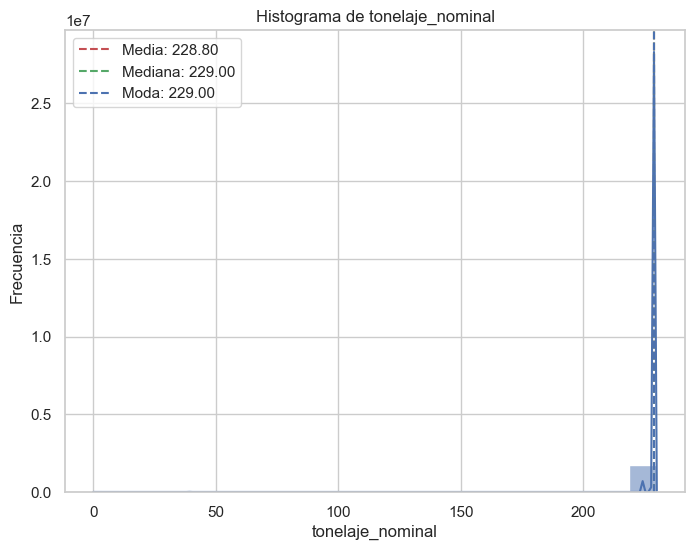

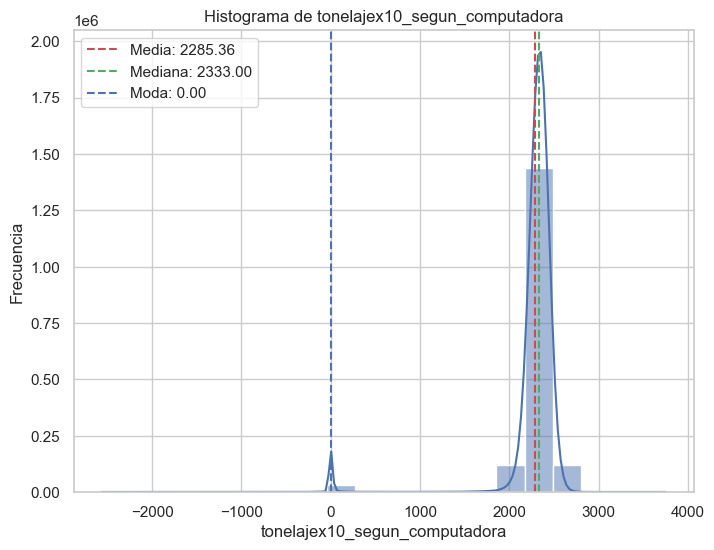

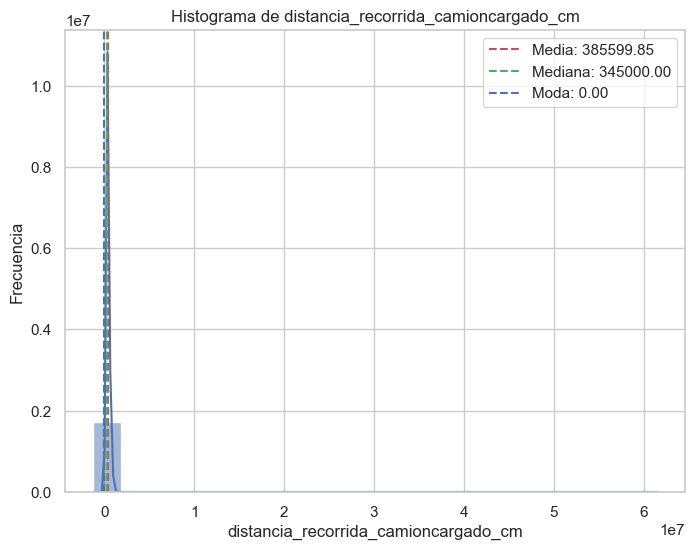

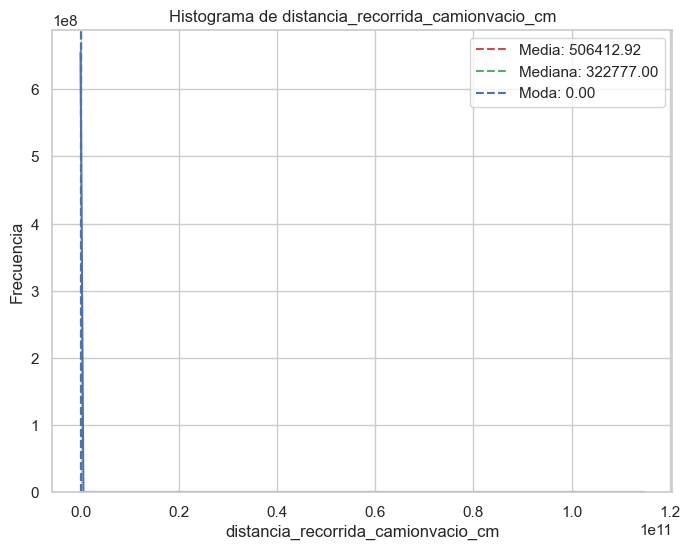

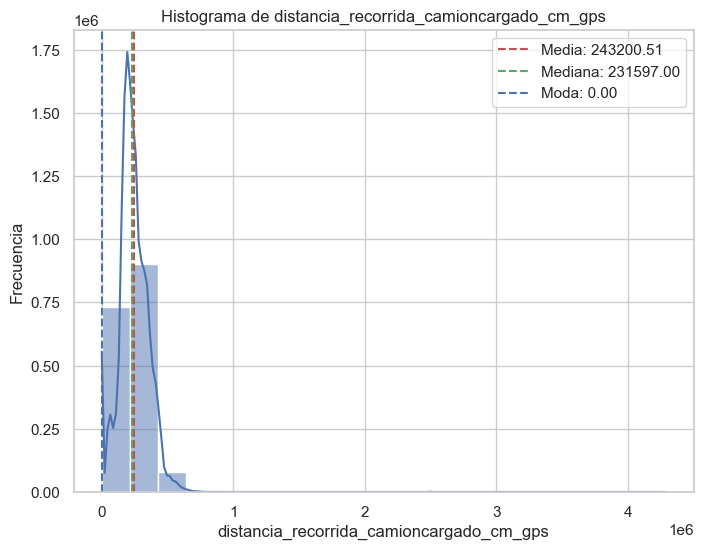

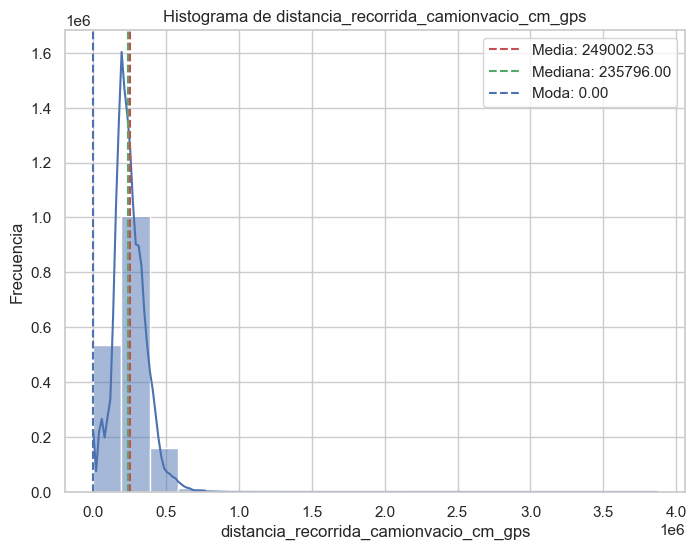

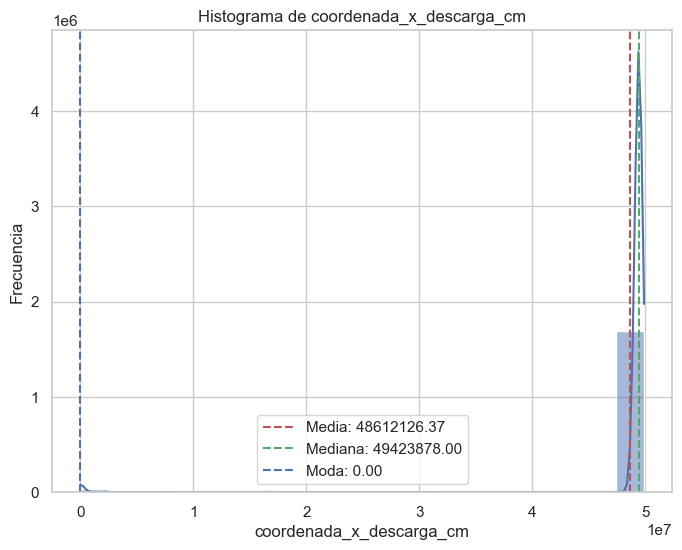

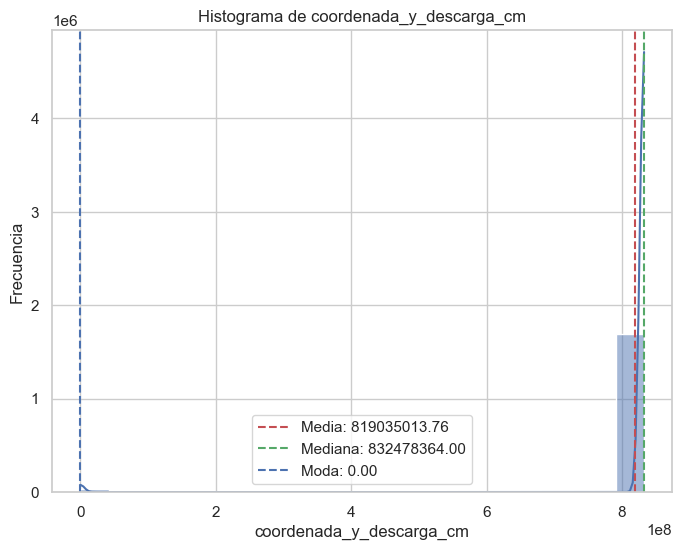

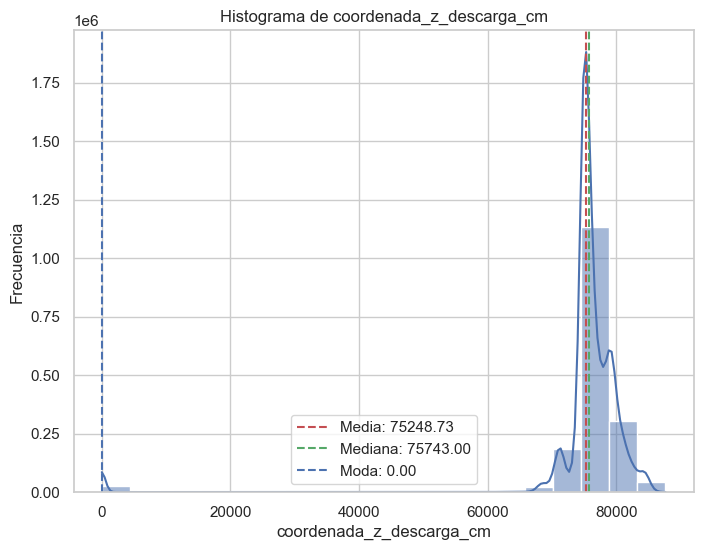

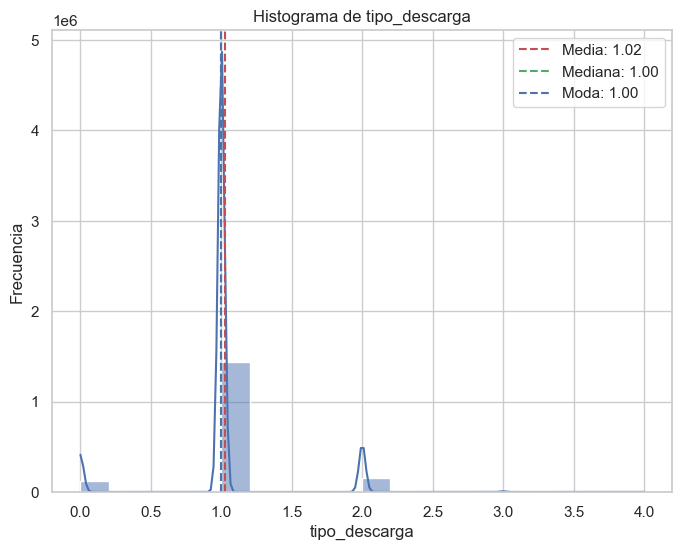

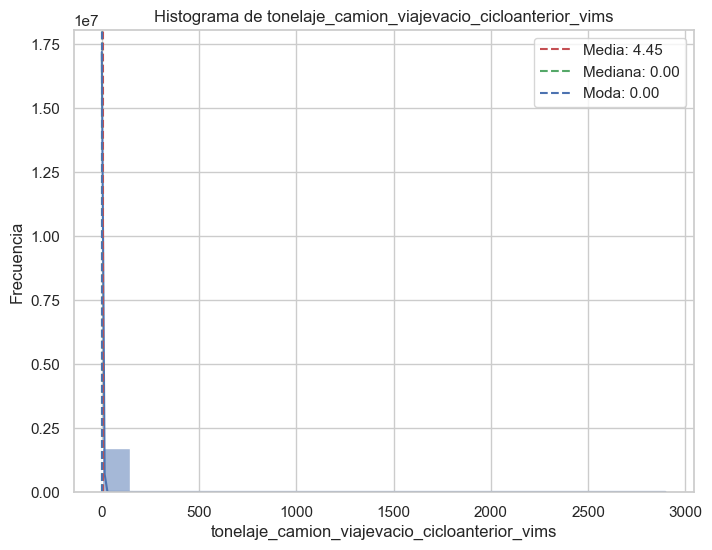

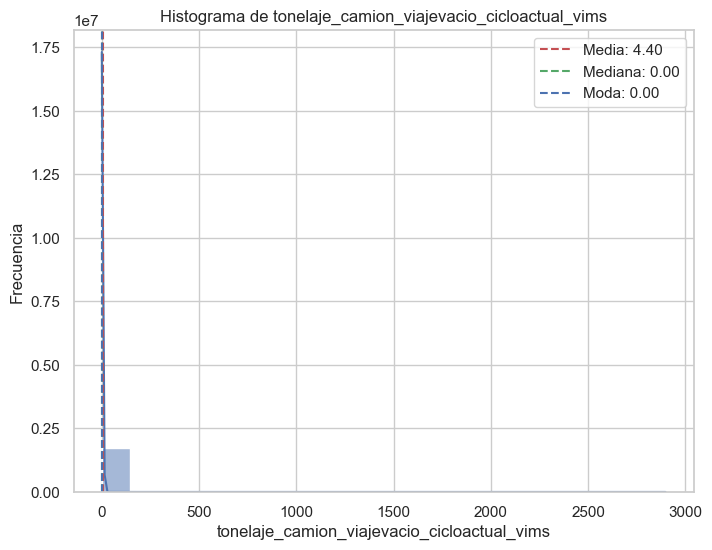

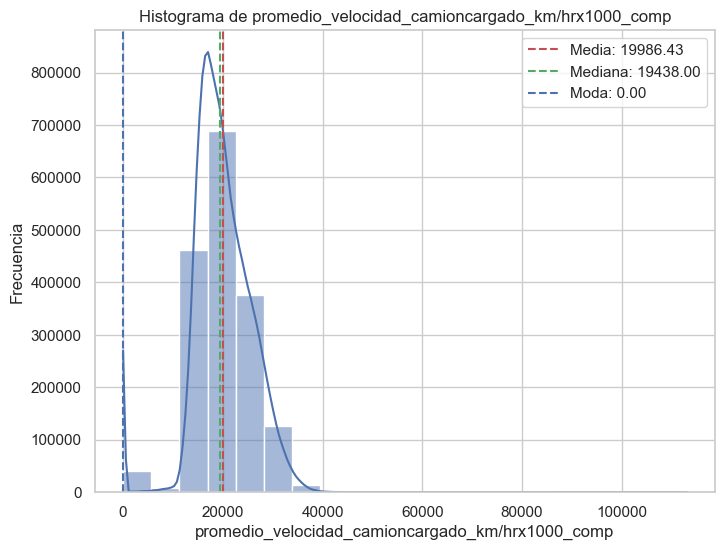

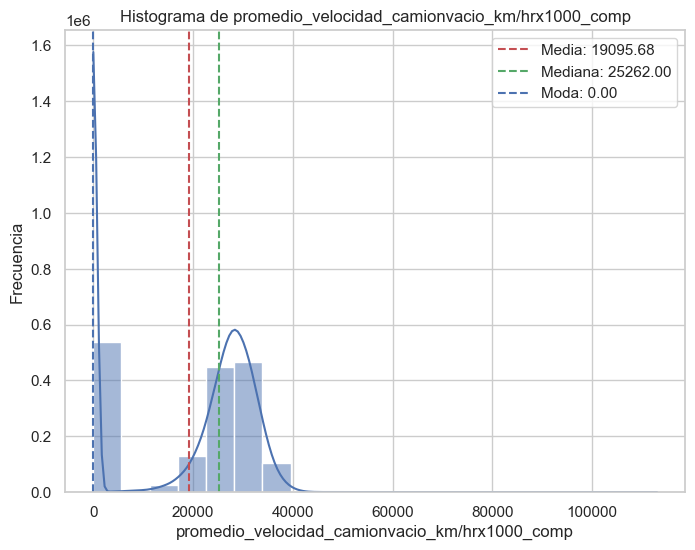

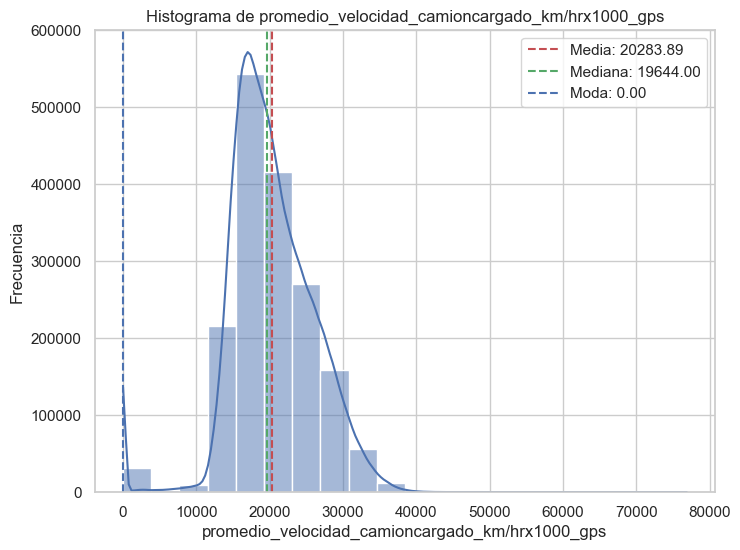

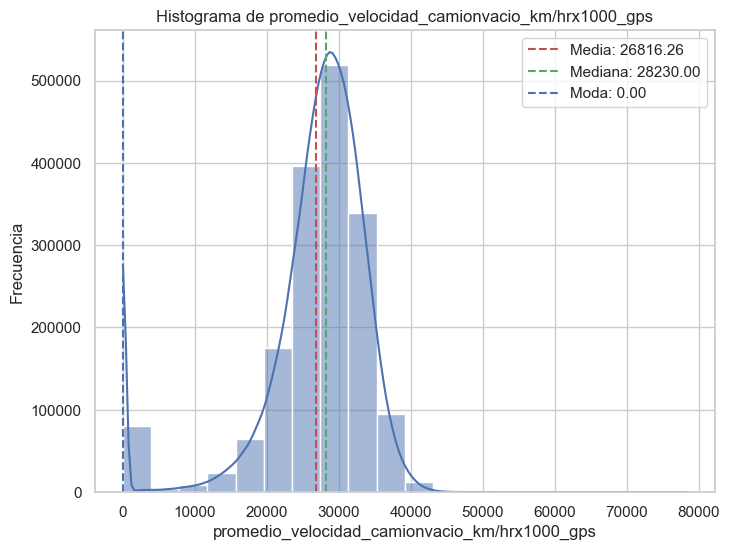

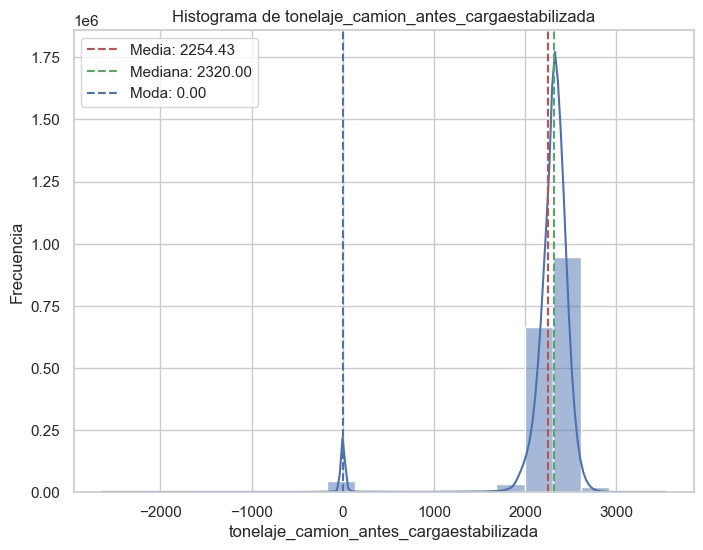

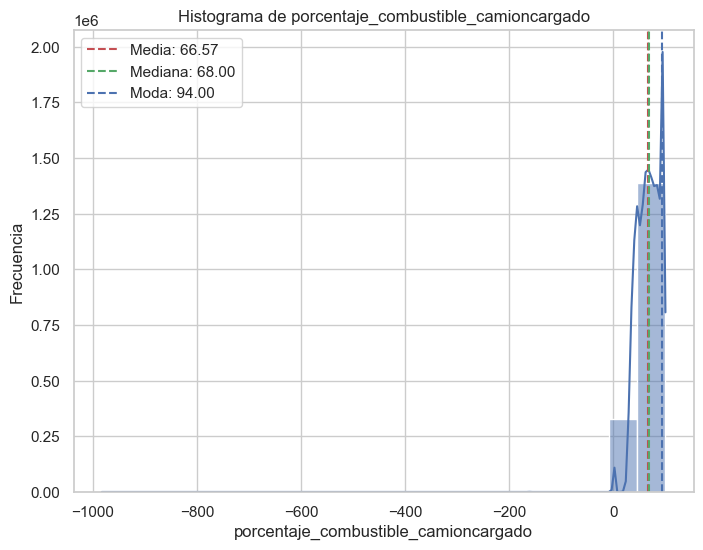

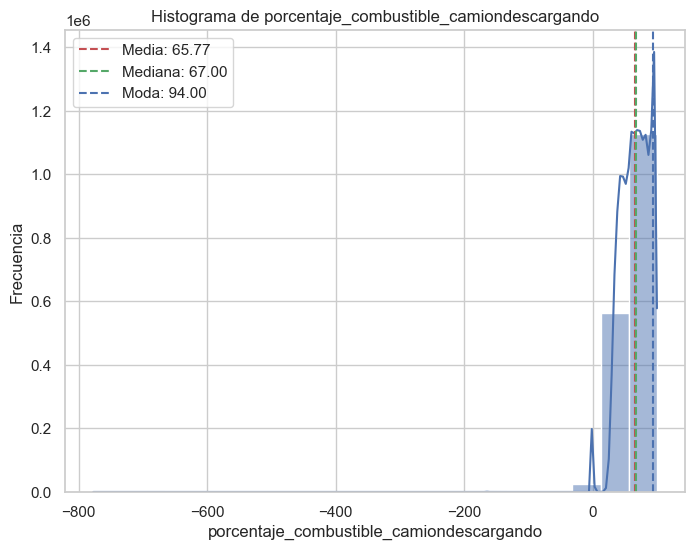

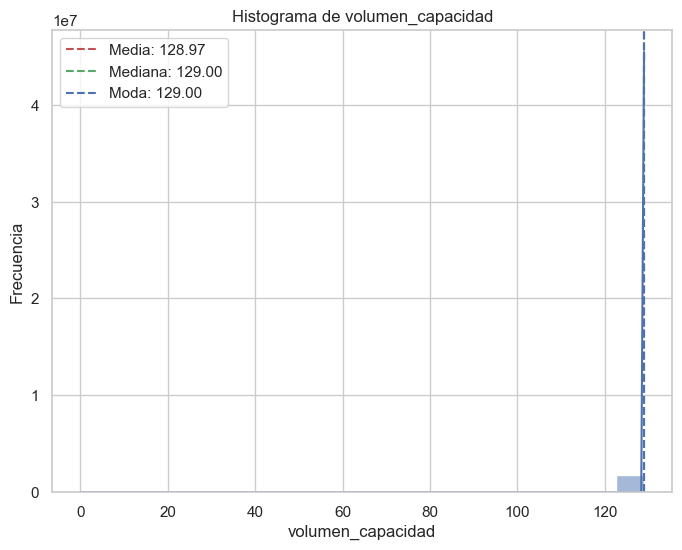

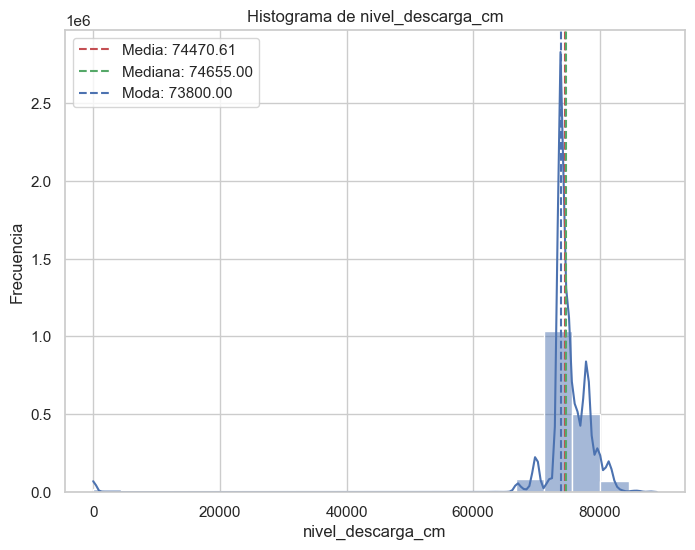

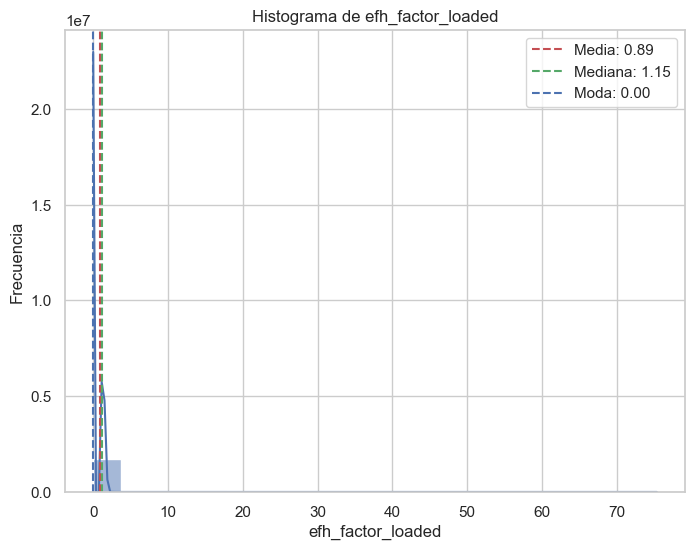

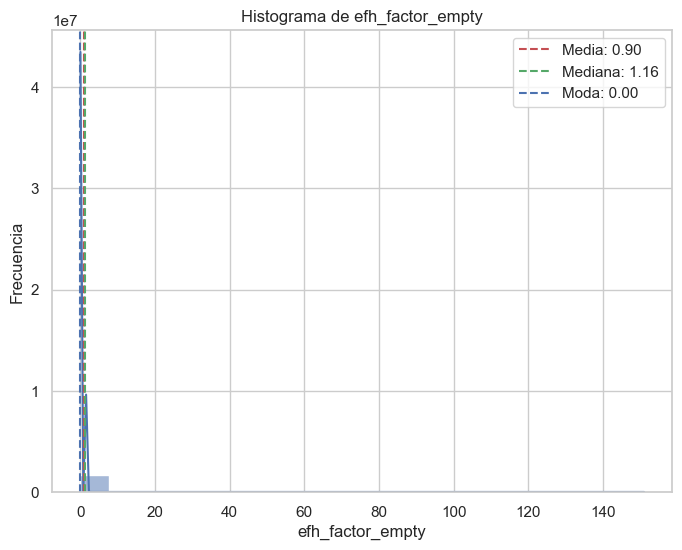

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'datos'

# Identificar las columnas numéricas y categóricas
columnas_numericas = datos.select_dtypes(include=['int', 'float']).columns

# Excluir las columnas que comienzan con 'id'
columnas_a_excluir = [col for col in datos.columns if col.startswith('id')]

# Filtrar las columnas numéricas que no están en columnas_a_excluir
columnas_a_incluir = [col for col in columnas_numericas if col not in columnas_a_excluir]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear histogramas solo para las columnas numéricas seleccionadas
for columna in columnas_a_incluir:
    plt.figure(figsize=(8, 6))
    sns.histplot(datos[columna], bins=20, kde=True)

    # Calcula la media, mediana y moda
    media = datos[columna].mean()
    mediana = datos[columna].median()
    moda = datos[columna].mode().iloc[0]  # Obtén el primer valor modal

    # Agrega líneas verticales y etiquetas
    plt.axvline(media, color='r', linestyle='--', label=f'Media: {float(media):.2f}')
    plt.axvline(mediana, color='g', linestyle='--', label=f'Mediana: {mediana:.2f}')
    plt.axvline(moda, color='b', linestyle='--', label=f'Moda: {float(moda):.2f}')

    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()

<span style="color: orange;">***Principales Insights del analisis de Histogramas***</span>
1. tonelajex10_segun_computadora
2. distancia_recorrida_camioncargado_cm_gps
3. distancia_recorrida_camionvacio_cm_gps

### *1.8 Analisis de Diagramas de Cajas*
**Definiciones:**  
- La caja representa el rango intercuartílico (IQR), que contiene el 50% central de los datos. 
- Rango intercuartílico(IQR): La caja se extiende desde el primer cuartil (Q1) hasta el tercer cuartil (Q3). El IQR es la diferencia entre Q3 y Q1 y contiene la mayoría de los datos. La longitud de la caja muestra la variabilidad de los datos.
- Bigotes: Se extienden desde la caja y muestran los valores mínimos y máximos dentro de un cierto rango.
- Valores atípicos (outliers): Se muestran como puntos individuales más allá de los bigotes. 

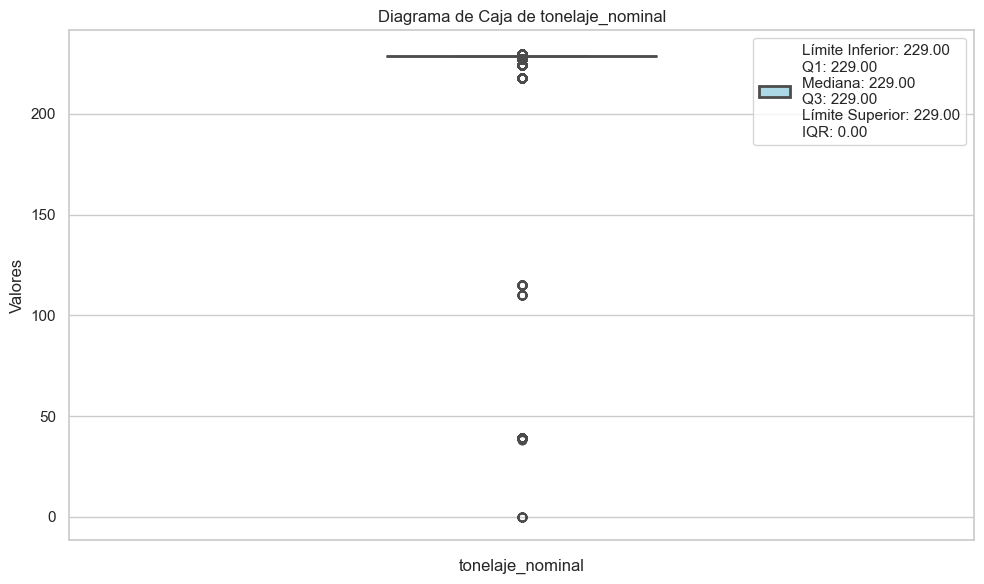

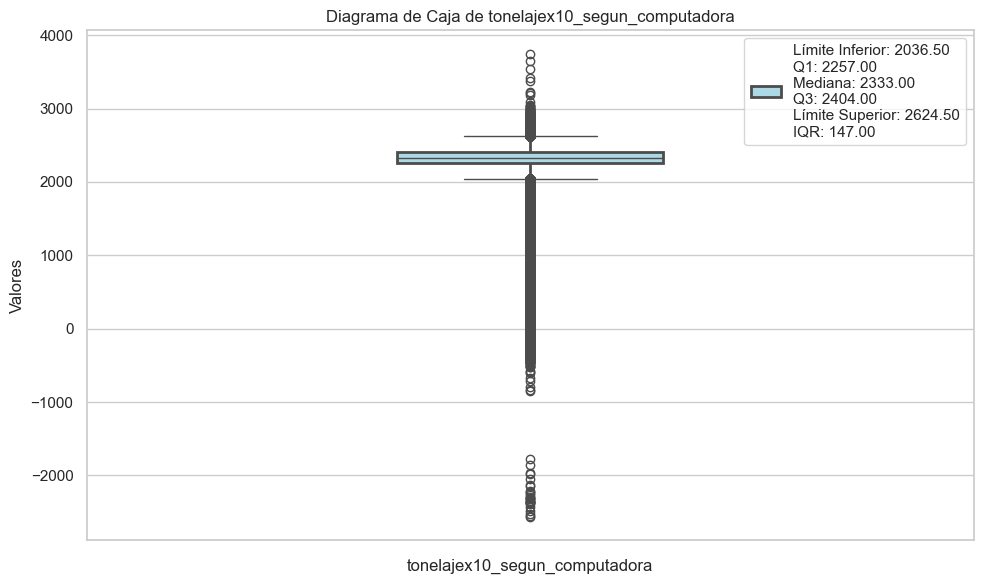

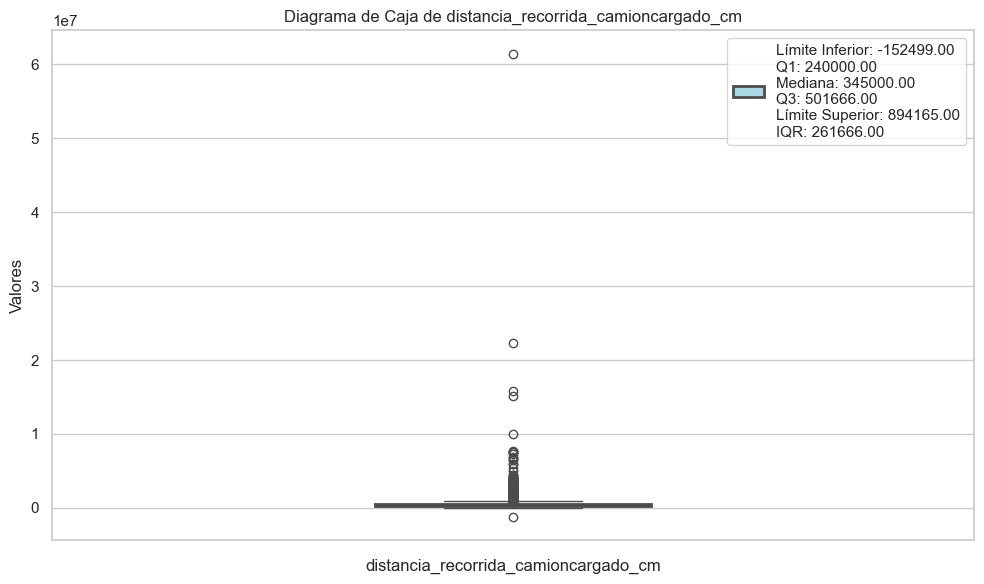

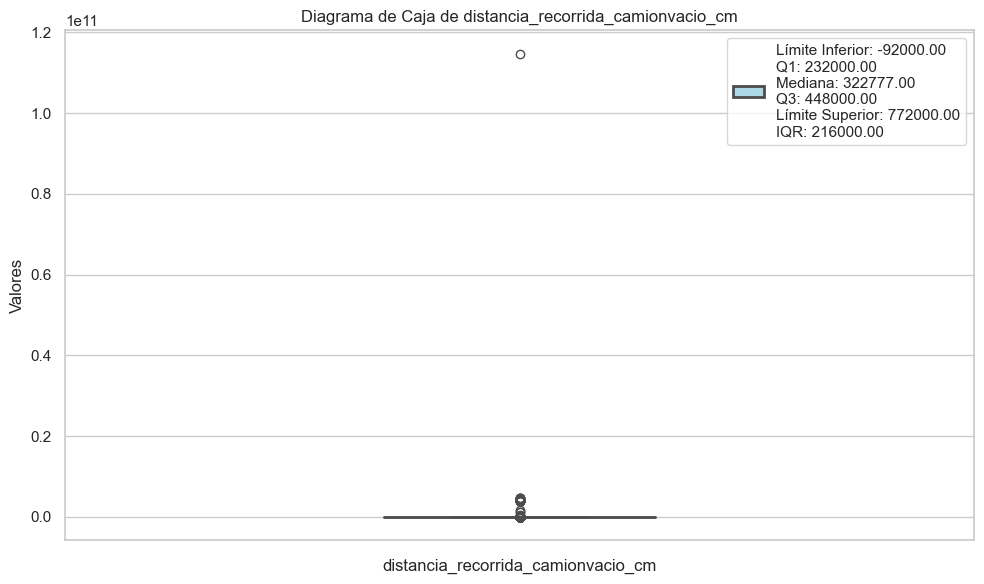

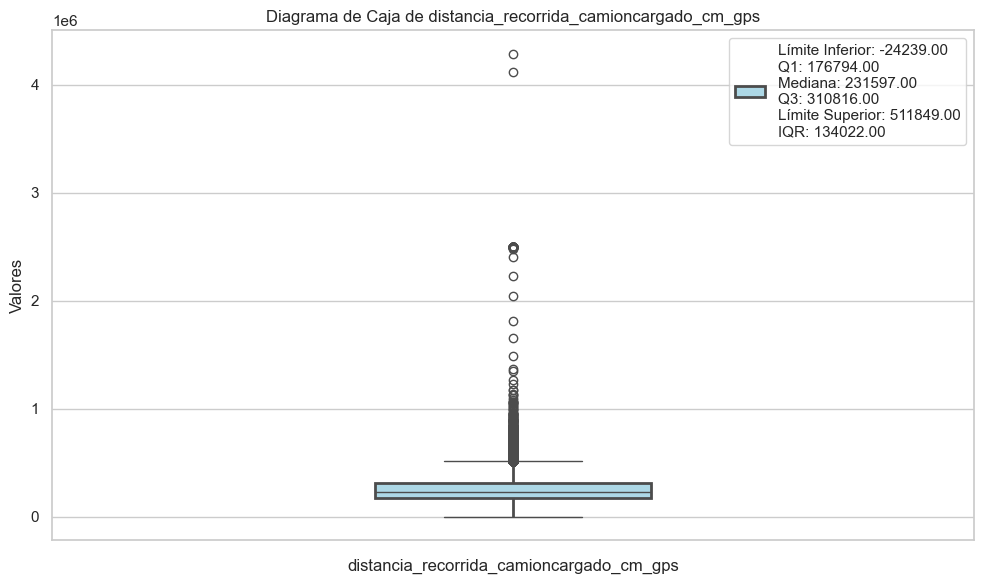

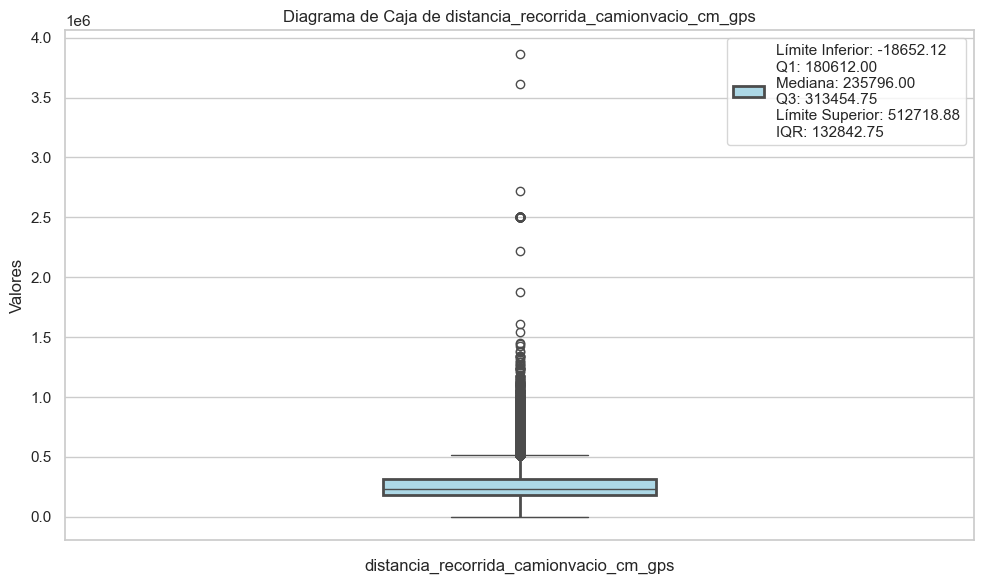

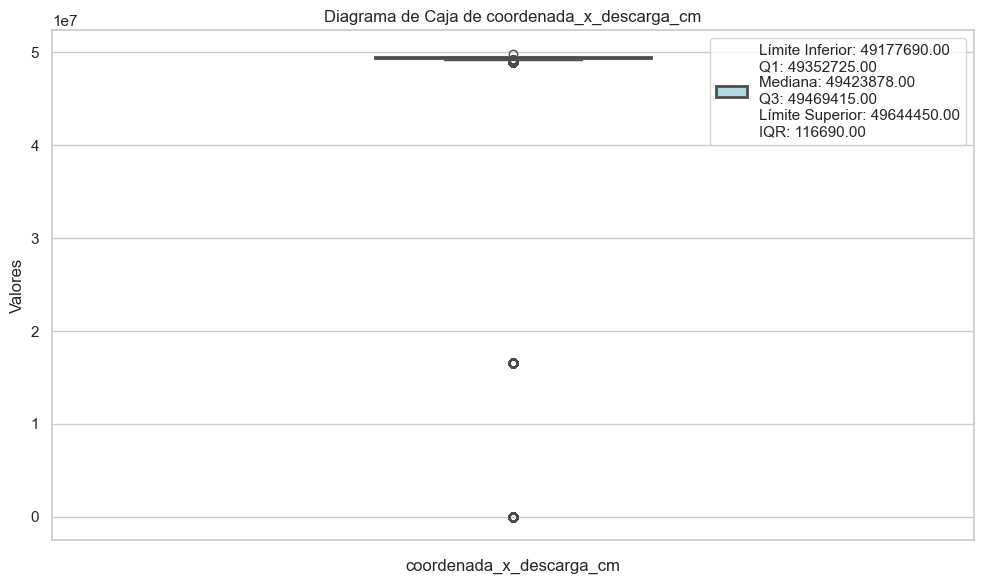

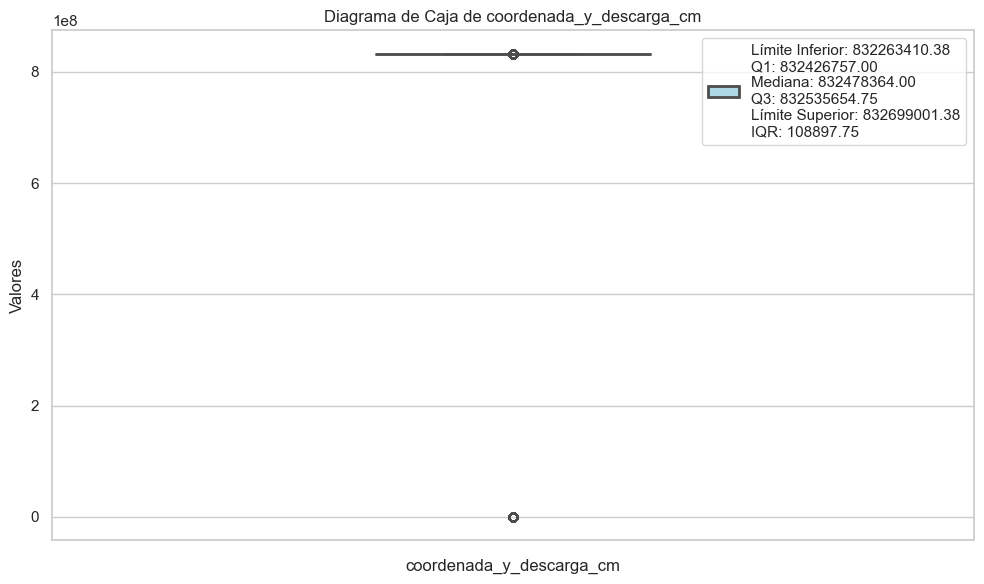

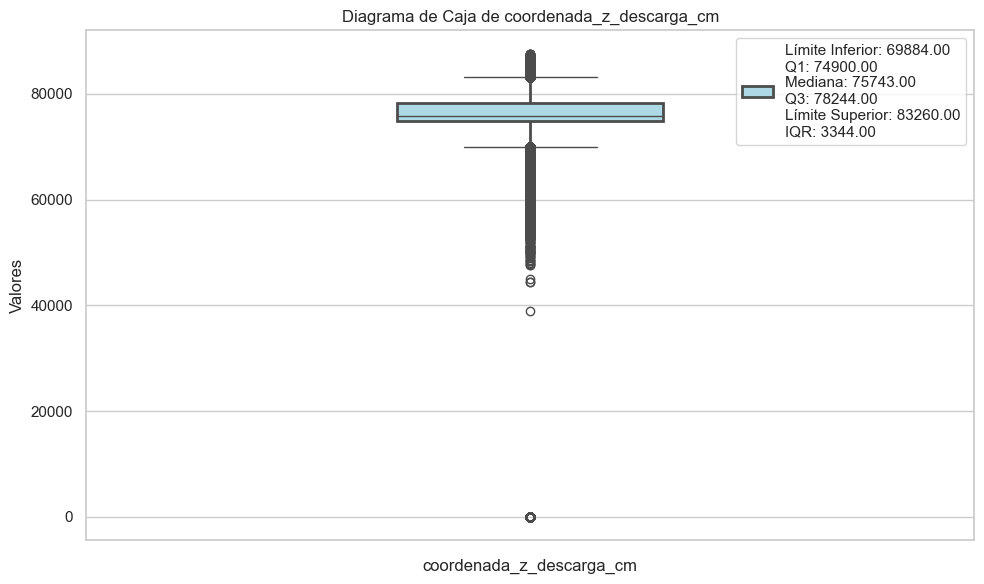

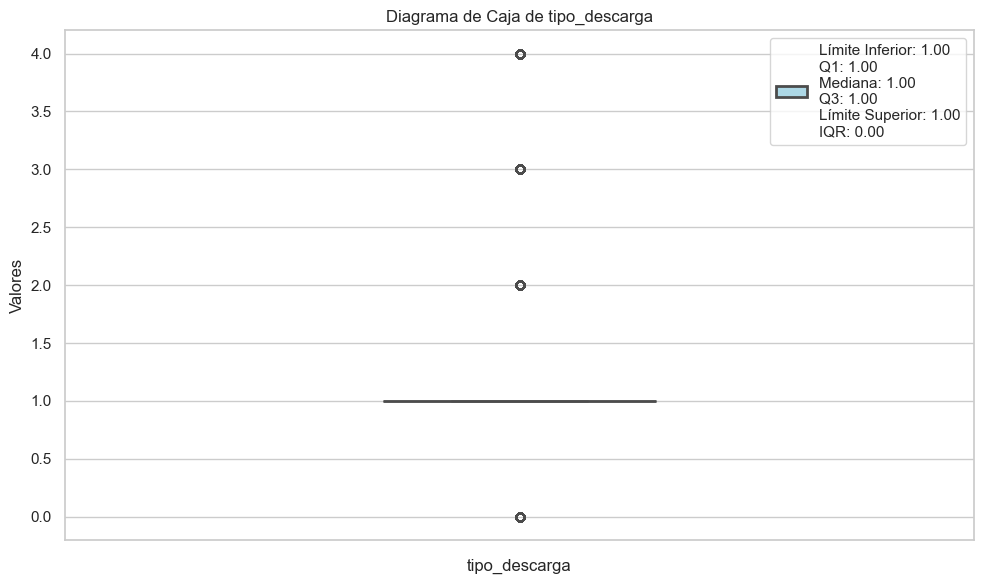

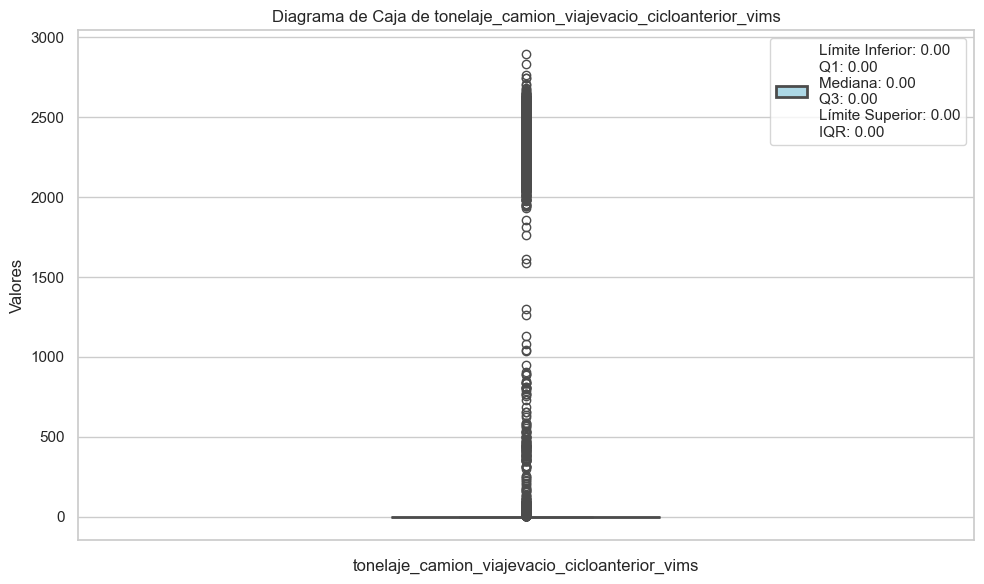

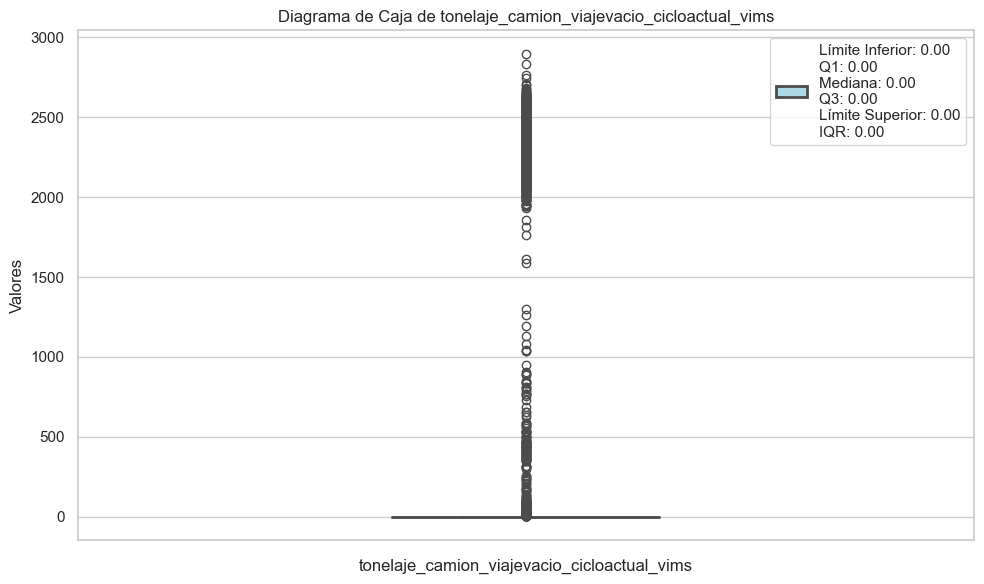

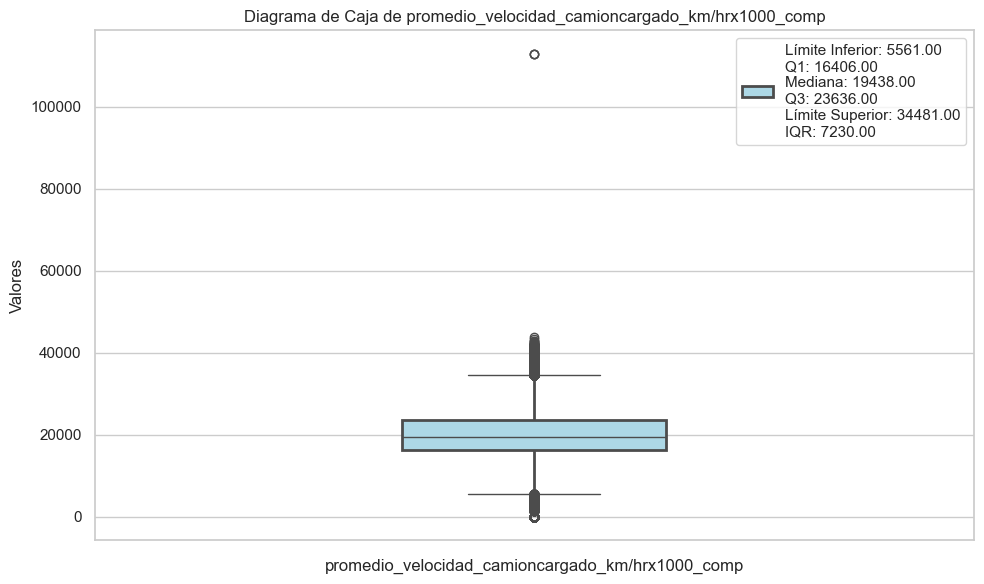

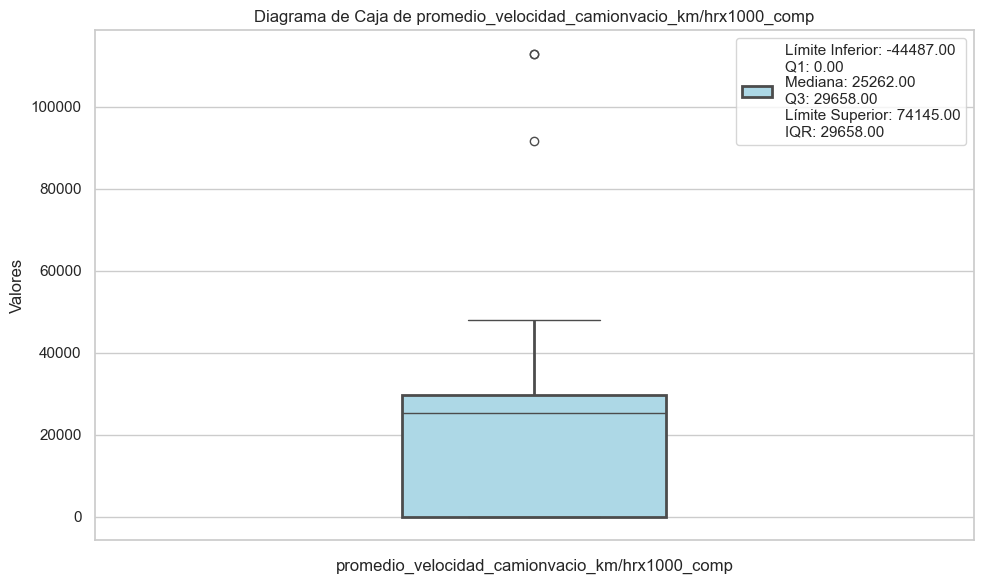

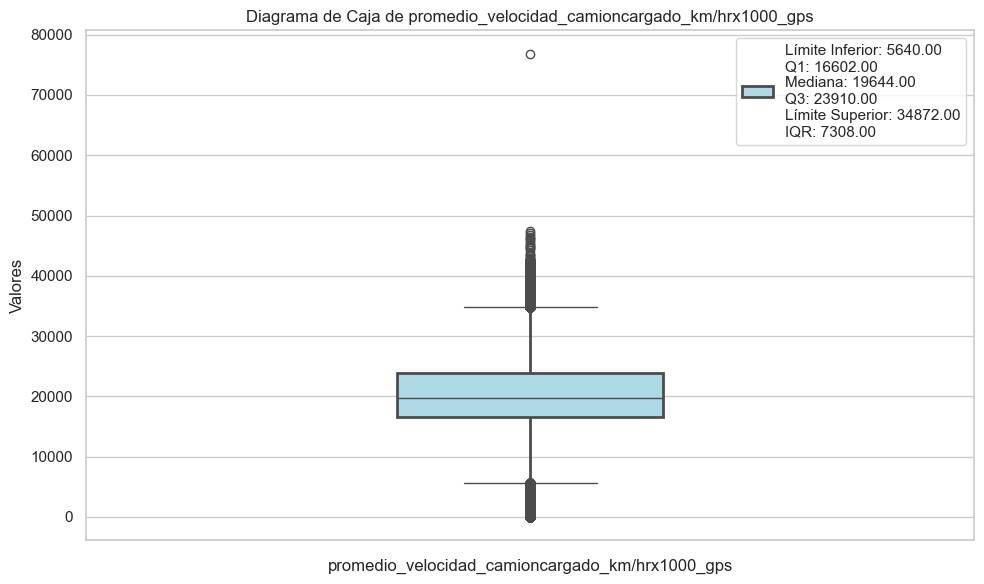

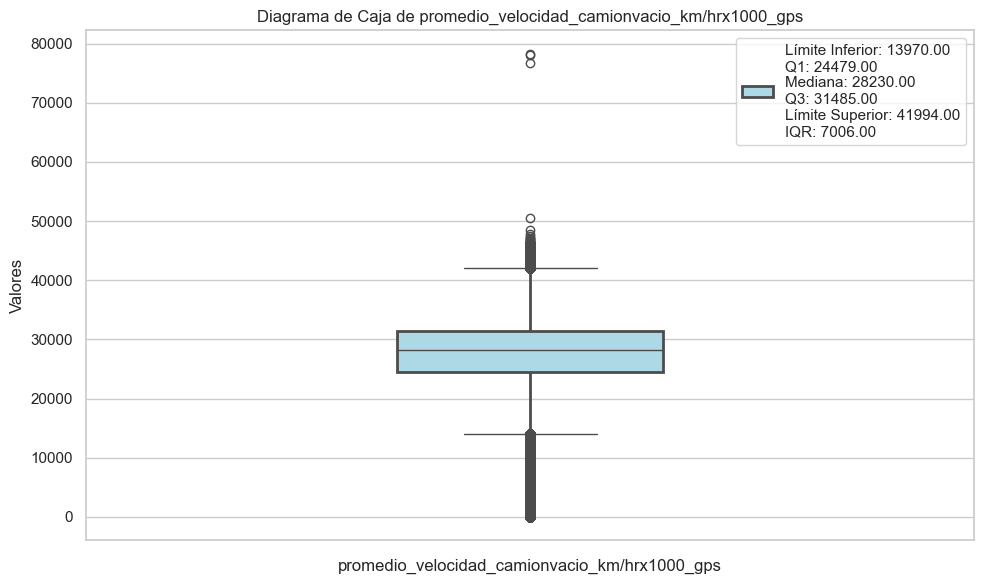

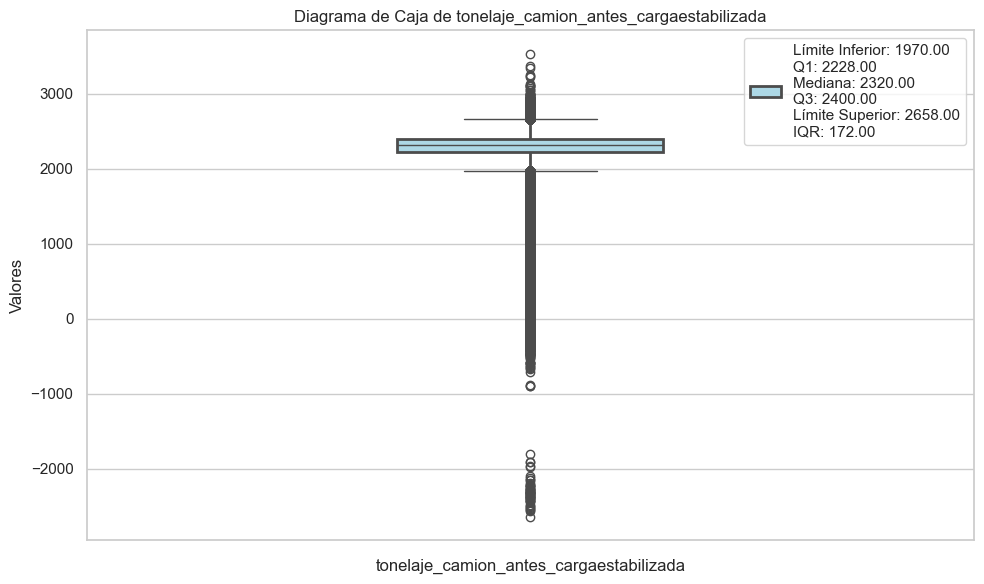

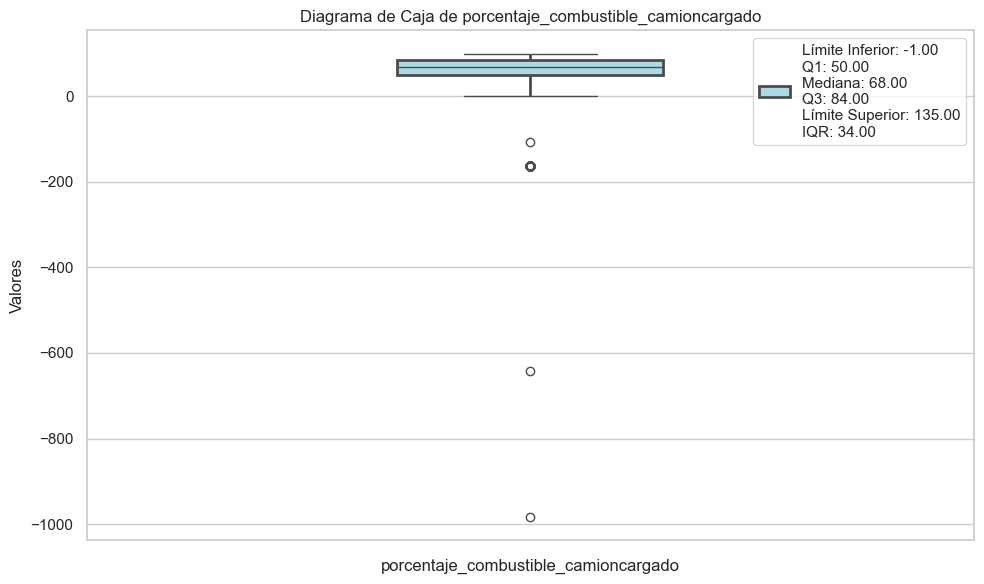

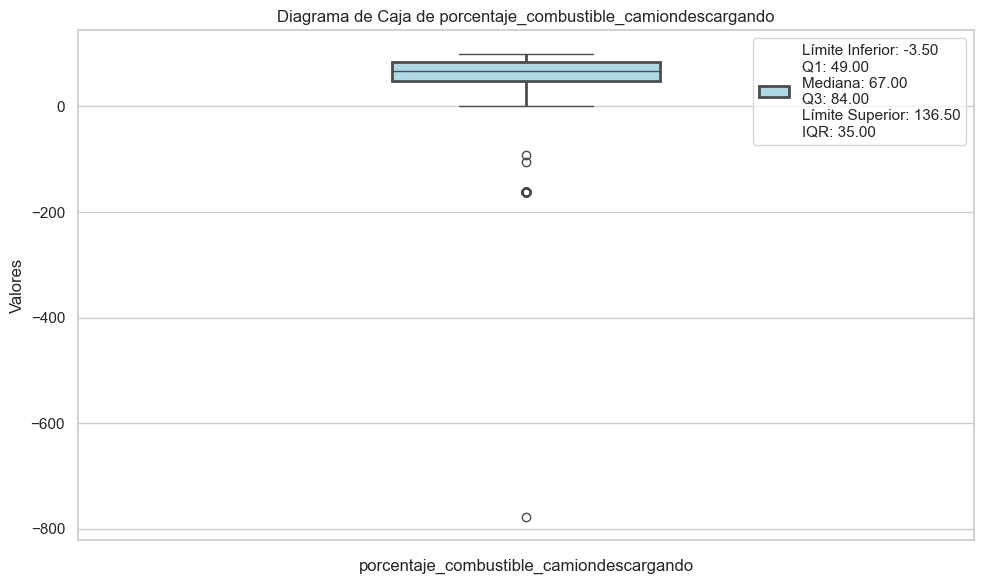

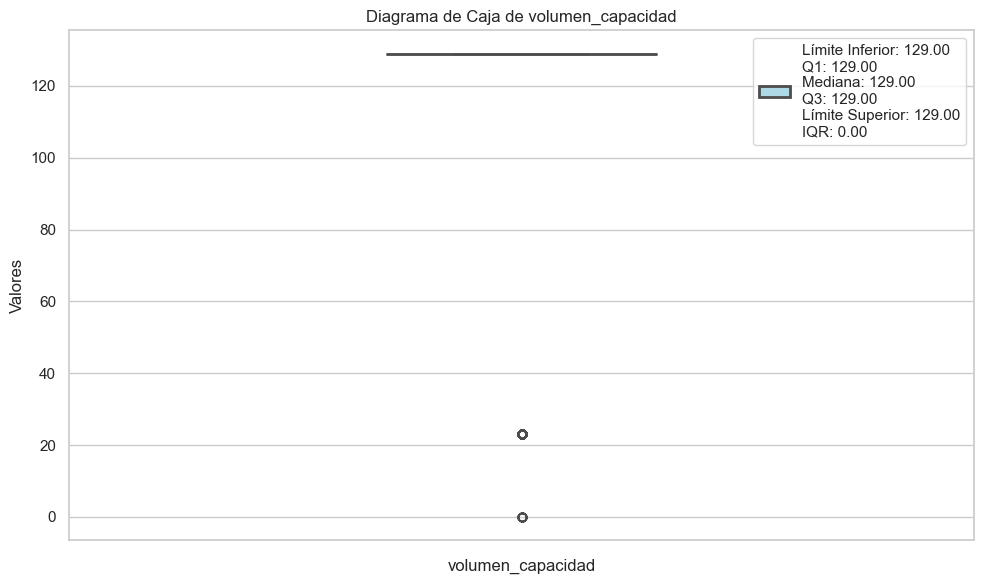

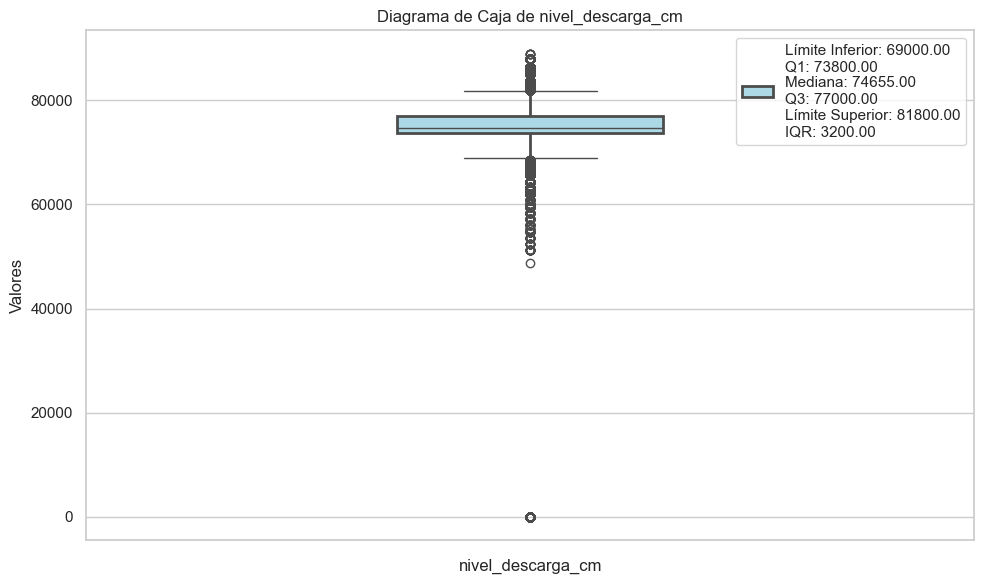

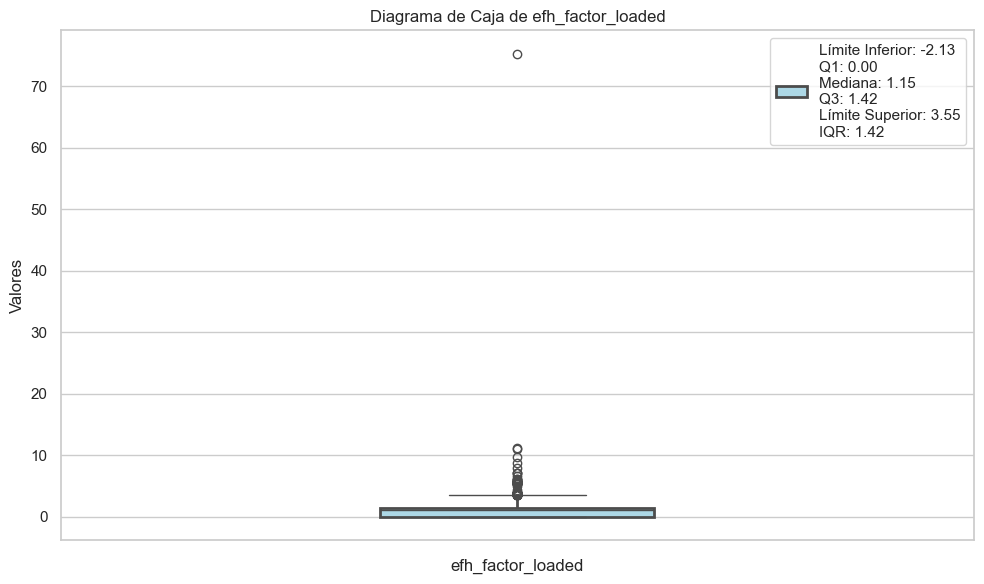

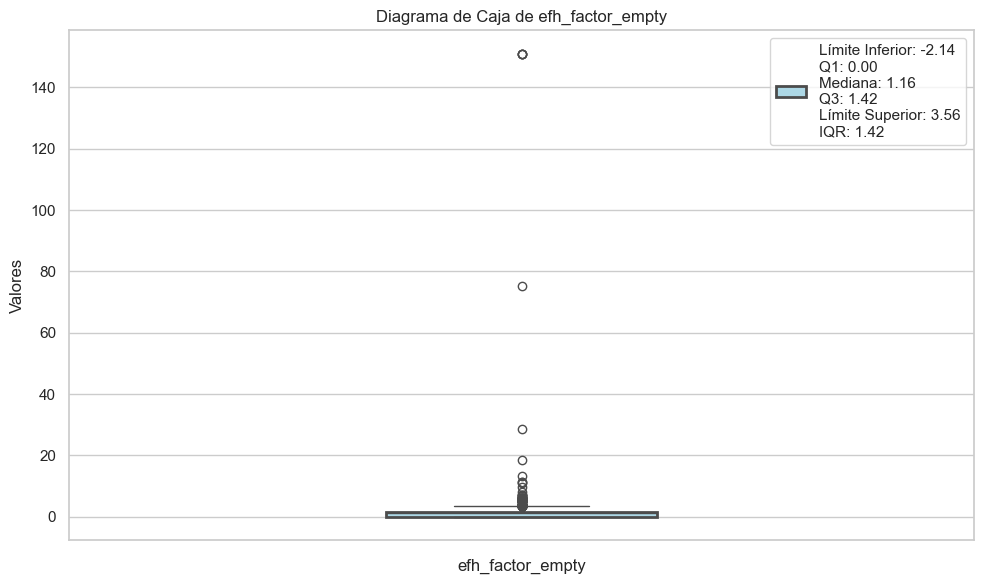

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Identificar las columnas numéricas y categóricas
columnas_numericas = datos.select_dtypes(include=['int', 'float']).columns

# Excluir las columnas que comienzan con 'id'
columnas_a_excluir = [col for col in datos.columns if col.startswith('id')]

# Filtrar las columnas numéricas que no están en columnas_a_excluir
columnas_a_incluir = [col for col in columnas_numericas if col not in columnas_a_excluir]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear diagramas de caja con bigotes como líneas y una leyenda
for columna in columnas_a_incluir:
    plt.figure(figsize=(10, 6))
    
    # Configurar el estilo de la caja y los bigotes
    boxprops = {'facecolor': 'lightblue', 'linewidth': 2}
    whiskerprops = {'linewidth': 2}
    
    sns.boxplot(data=datos, y=columna, boxprops=boxprops, whiskerprops=whiskerprops, width=0.3)
    
    plt.title(f'Diagrama de Caja de {columna}')
    plt.xlabel(columna)
    plt.ylabel("Valores")
    
    # Calcular estadísticas
    mediana = datos[columna].median()
    Q1 = datos[columna].quantile(0.25)
    Limite_inferior = datos[columna].quantile(0.25) - 1.5 * (datos[columna].quantile(0.75) - datos[columna].quantile(0.25))
    Q3 = datos[columna].quantile(0.75)
    Limite_superior = datos[columna].quantile(0.75) + 1.5 * (datos[columna].quantile(0.75) - datos[columna].quantile(0.25))
    IQR = Q3 - Q1
    
    # Crear la leyenda
    leyenda = f'Límite Inferior: {Limite_inferior:.2f}\nQ1: {Q1:.2f}\nMediana: {mediana:.2f}\nQ3: {Q3:.2f}\nLímite Superior: {Limite_superior:.2f}\nIQR: {IQR:.2f}'
    
    # Colocar la leyenda fuera del gráfico, en el lado derecho superior
    plt.legend([leyenda], loc='upper right', bbox_to_anchor=(1, 1))
    
    # Ajustar la disposición de elementos en el gráfico
    plt.tight_layout()
    
    plt.show()

<span style="color: orange;">***Principales Insights del analisis de Diagramas de Cajas***</span>
1. tonelajex10_segun_computadora

### 1.9 *Matriz de Correlacion (Sin Tratamiento de Outliers)*
- Rango de valores: La correlación varía en un rango de -1 a 1.  
Un **valor de 1** indica una correlación positiva perfecta, lo que significa que las dos variables aumentan juntas de manera lineal.  
Un **valor de -1** indica una correlación negativa perfecta, lo que significa que una variable aumenta mientras que la otra disminuye de manera lineal.  
Un **valor cercano a 0** indica una correlación débil o inexistente.
- Dirección de la correlación:   
***|r| < 0.3: Se considera una correlación débil.  
0.3 ≤ |r| < 0.7: Se considera una correlación moderada.  
|r| ≥ 0.7: Se considera una correlación fuerte.***  

    Una correlación positiva significa que a medida que una variable aumenta, la otra también tiende a aumentar.  
    Una correlación negativa indica que a medida que una variable aumenta, la otra tiende a disminuir.


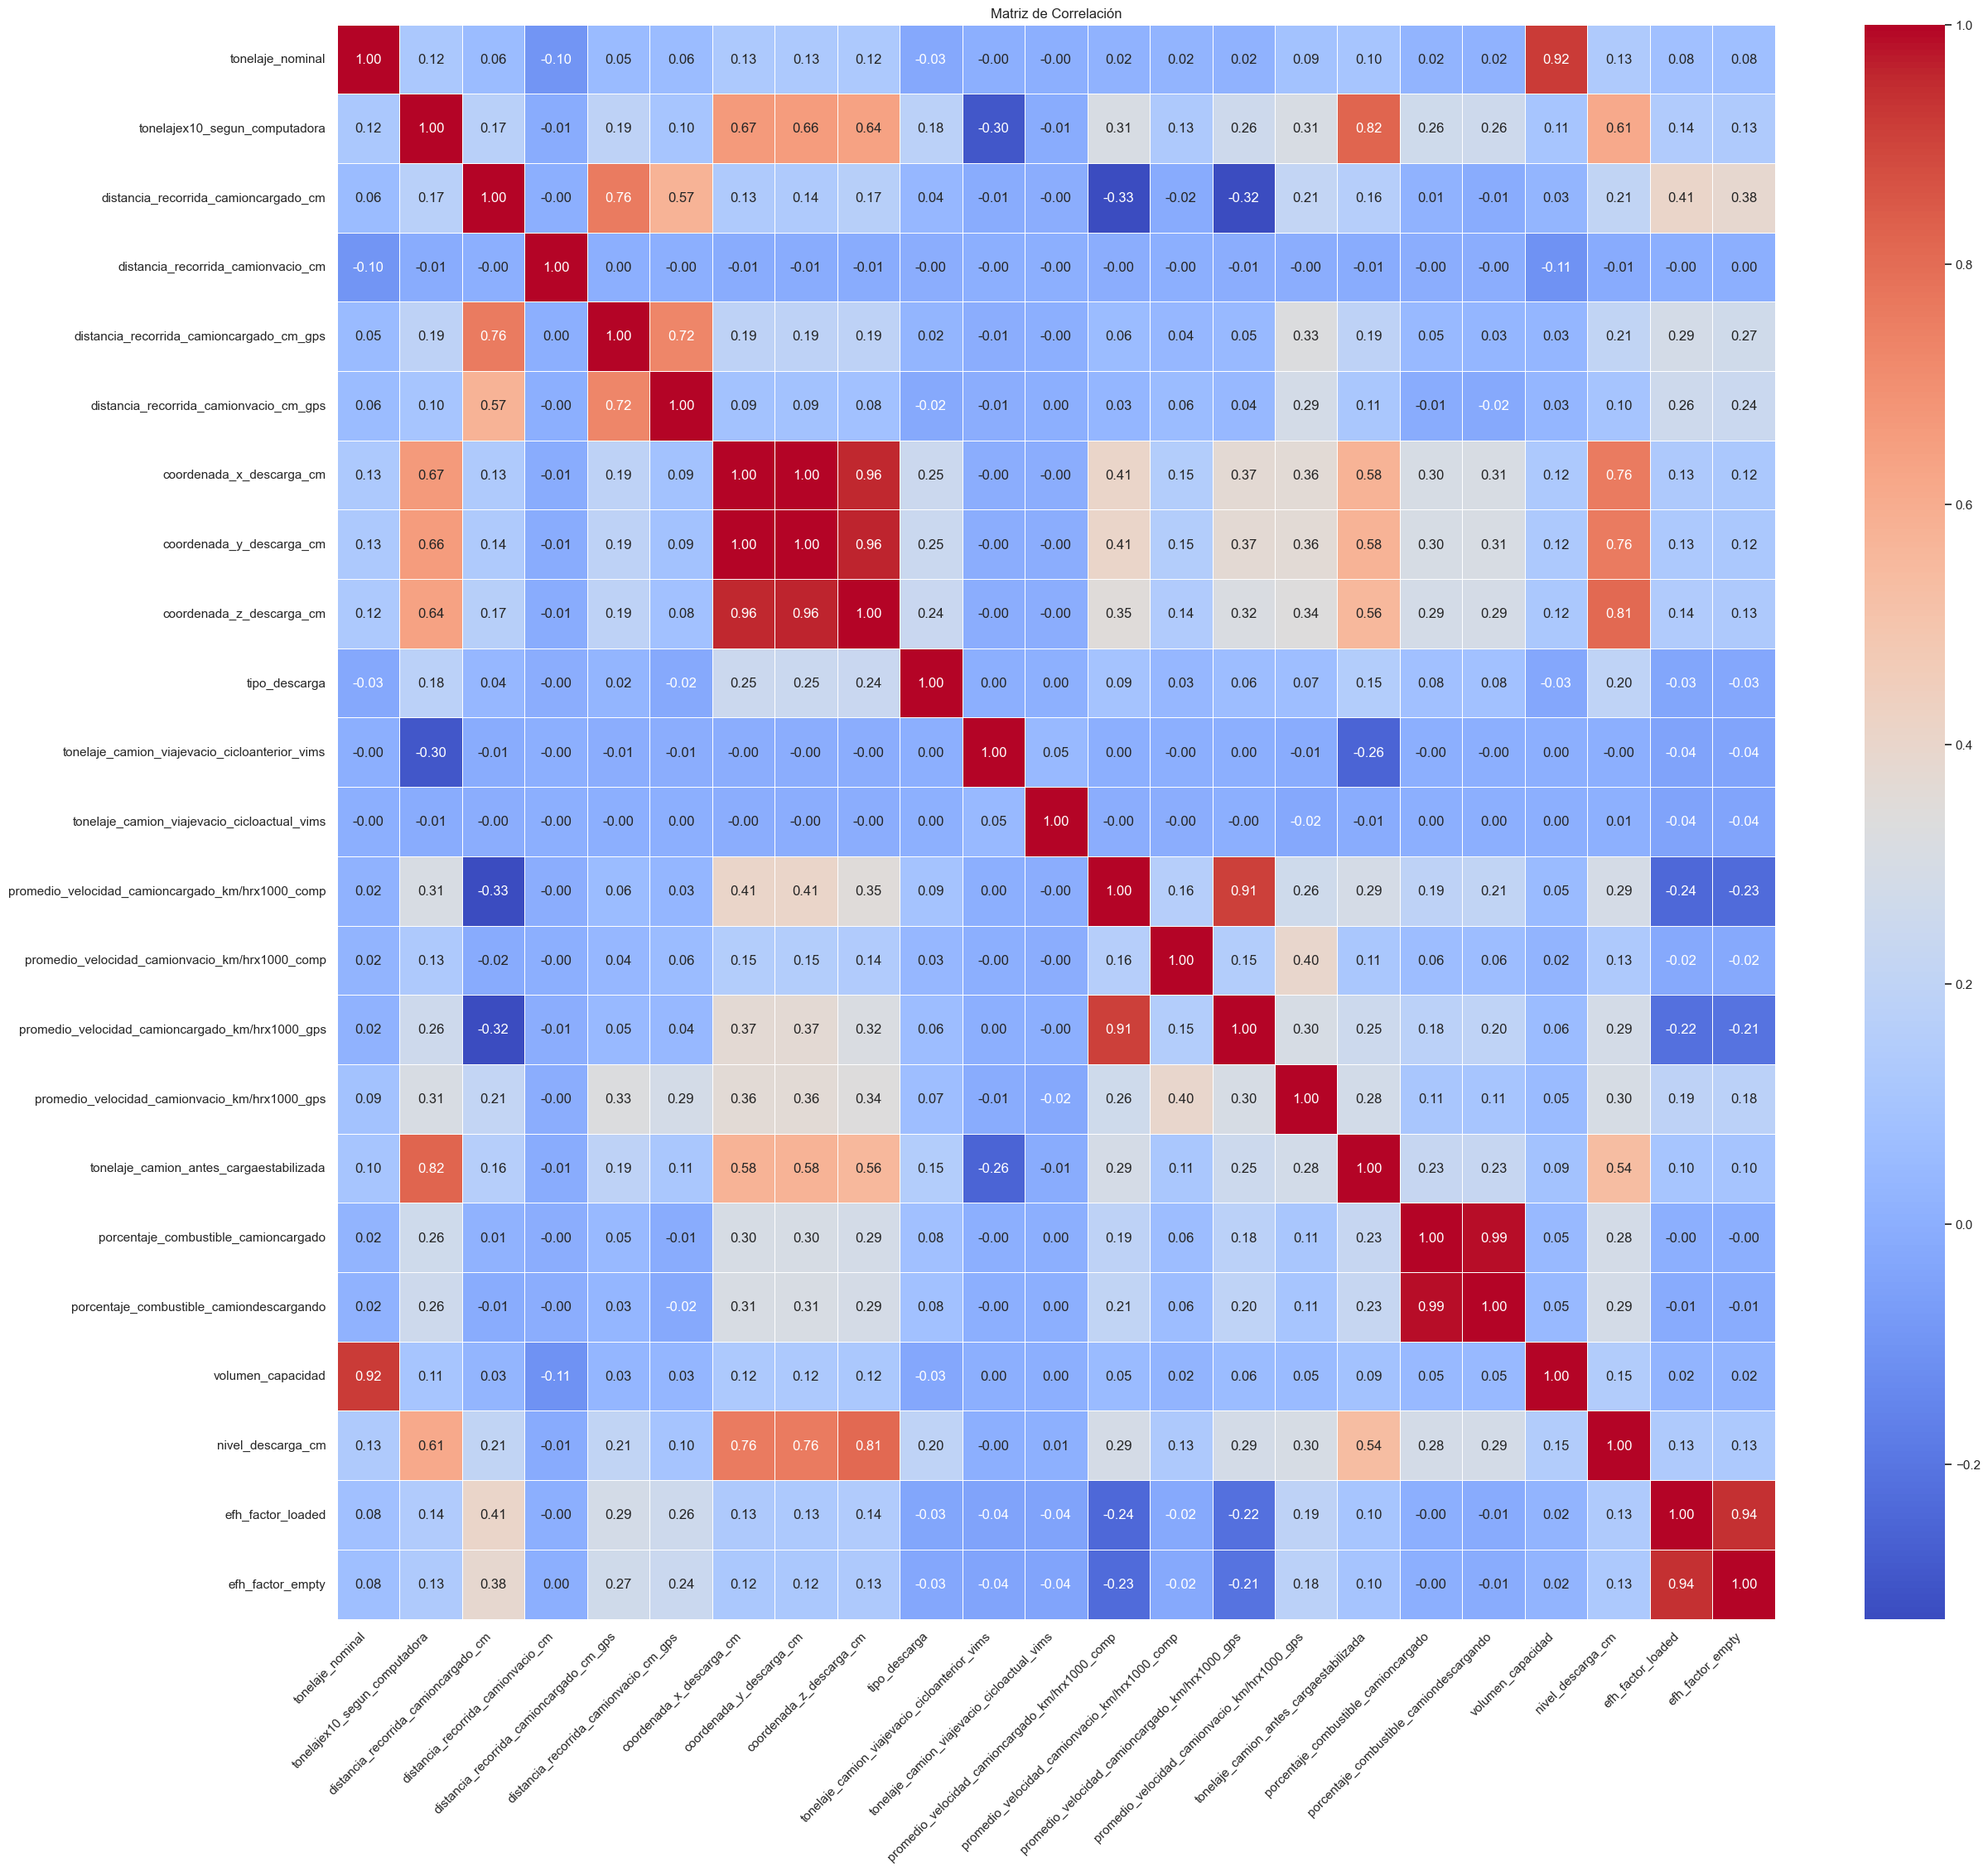

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'datos'

# Identificar las columnas numéricas
columnas_numericas = datos.select_dtypes(include=['int', 'float']).columns

# Excluir las columnas que comienzan con 'id'
columnas_numericas = [col for col in columnas_numericas if not col.startswith('id')]

# Crear una matriz de correlación
matriz_correlacion = datos[columnas_numericas].corr()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Aumentar el tamaño del gráfico para mostrar más detalles
plt.figure(figsize=(28, 25))

# Crear un mapa de calor (heatmap) de la matriz de correlación con desplazamiento habilitado
ax = sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)

# Agregar etiquetas a los ejes X e Y
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

plt.title("Matriz de Correlación")
plt.show()

<span style="color: orange;">***Principales Insights del analisis de la Matriz de Correlacion***</span>
1. tonelajex10_segun_computadora

# 2. **PREPARACION DE LOS DATOS**

### *2.3 TRATAMIENTO DE OUTLIERS*

- Eliminar los valores atípicos:

Este enfoque implica eliminar directamente los valores atípicos de tu conjunto de datos. Puedes hacerlo eliminando las filas que contienen valores atípicos en una o varias columnas.
Ventajas:
Puede mejorar la calidad de tus análisis al eliminar valores que puedan distorsionar tus resultados.
Puede ser útil si los outliers son errores de medición o valores claramente incoherentes.
Desventajas:
Puedes perder información valiosa al eliminar datos.
No siempre es la mejor opción, ya que algunos outliers pueden ser legítimos y relevantes para tu análisis.

- Limitar los valores atípicos a los límites del bigote (capping):

En este enfoque, en lugar de eliminar los valores atípicos, los limitas estableciendo un valor máximo y mínimo basado en los límites del bigote en un diagrama de caja.
Ventajas:
Conserva todos los datos, evitando la pérdida de información.
Puede ayudar a reducir el impacto de los outliers sin eliminarlos por completo.
Desventajas:
Puede introducir sesgo en tus datos si no se seleccionan adecuadamente los límites de corte.
No es apropiado para todos los casos, ya que puede no ser una solución efectiva para valores atípicos extremadamente alejados.

In [26]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'datos'

# Obtener una lista de las columnas numéricas excluyendo las que comienzan con 'id'
columnas_numericas = [col for col in datos.select_dtypes(include=['int', 'float']).columns if not col.startswith('id')]

# Iterar a través de las columnas numéricas y limitar los valores atípicos
for columna in columnas_numericas:
    # Calcular el Q1 y Q3 de la columna
    Q1 = datos[columna].quantile(0.25)
    Q3 = datos[columna].quantile(0.75)

    # Calcular el rango intercuartilico (IQR)
    IQR = Q3 - Q1

    # Calcular los límites inferior y superior del bigote
    Limite_inferior = Q1 - 1.5 * IQR
    Limite_superior = Q3 + 1.5 * IQR

    # Limitar los valores atípicos a los límites del bigote en la columna
    datos[columna] = datos[columna].clip(lower=Limite_inferior, upper=Limite_superior)

# Los valores atípicos en todas las variables (que no comienzan con 'id') están limitados a los límites del bigote

### 1.10 *Matriz de Correlacion Con Tratamiento de Outliers (Limitando a Limite Superior y Inferior)*

Validamos que ahora los valores atipicos(Outliers) ahora estan limitados a los limites superior e inferior de los Bigotes del diagrama de cajas.

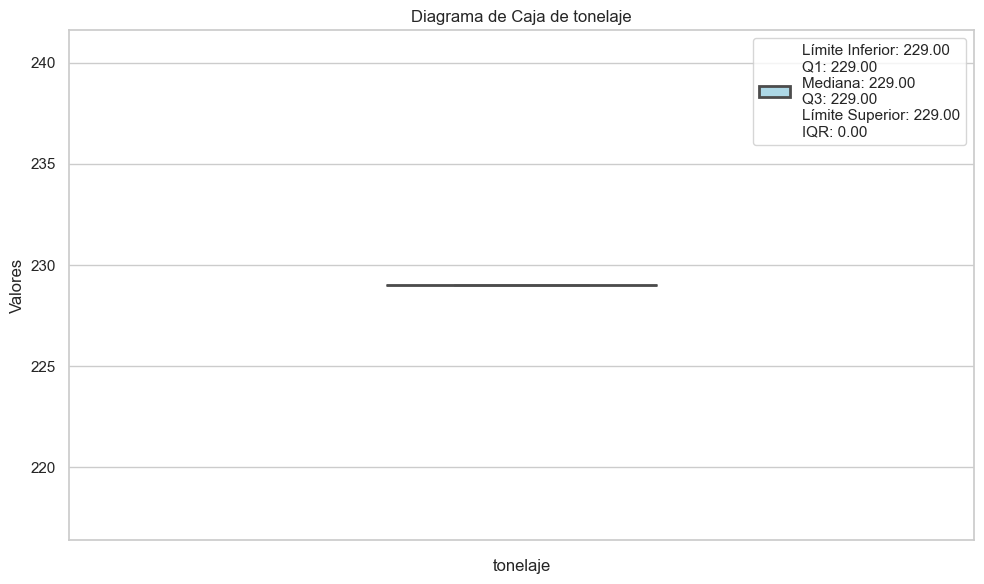

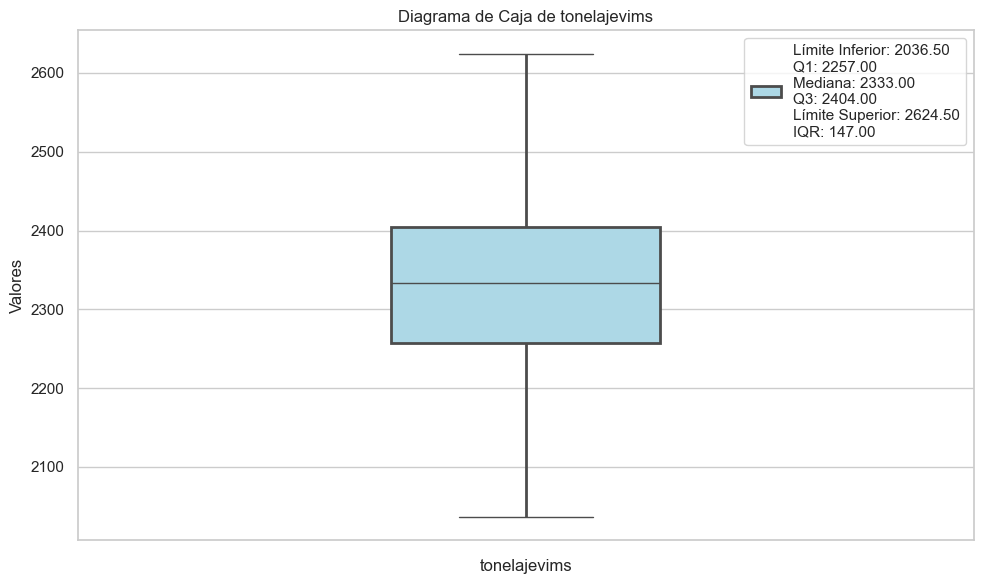

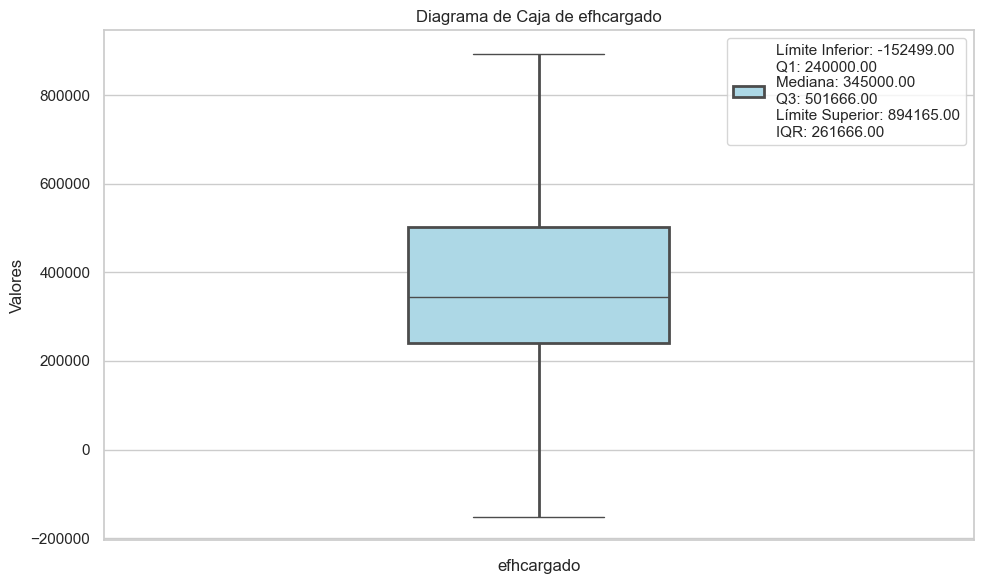

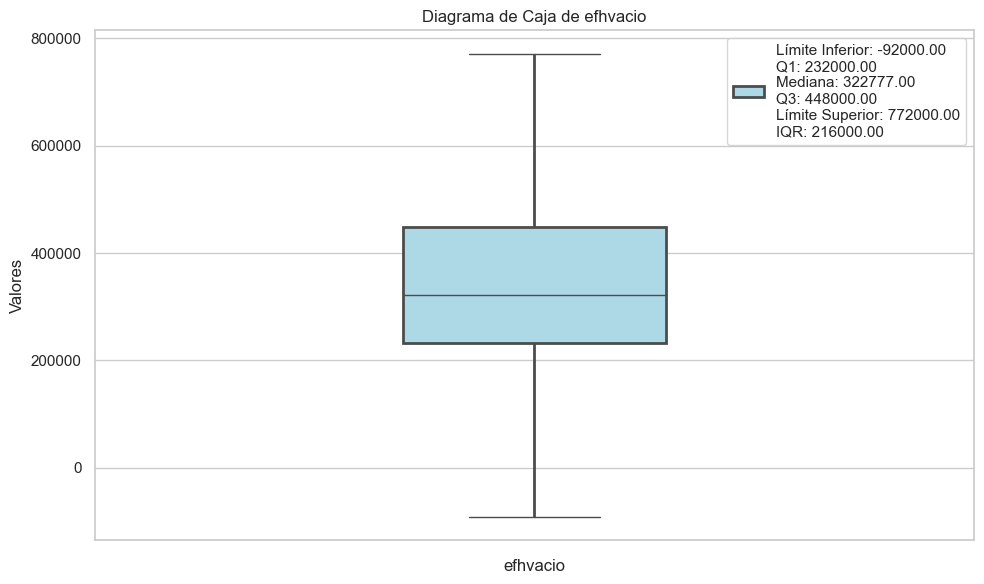

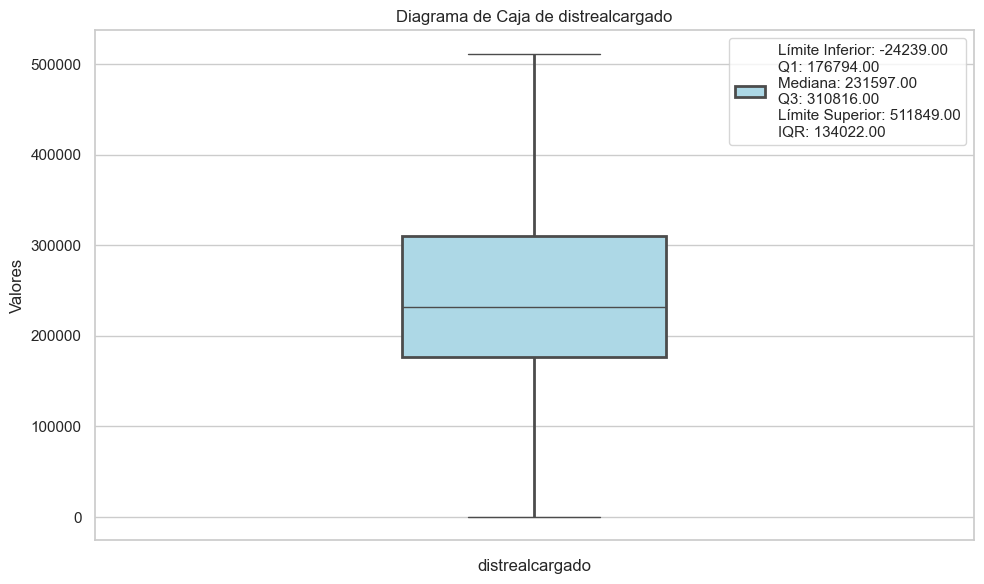

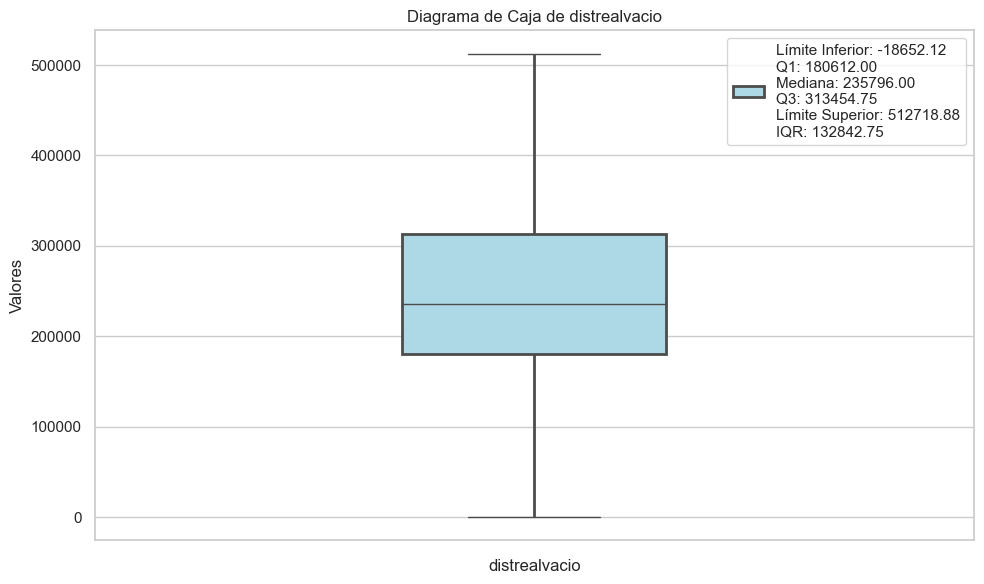

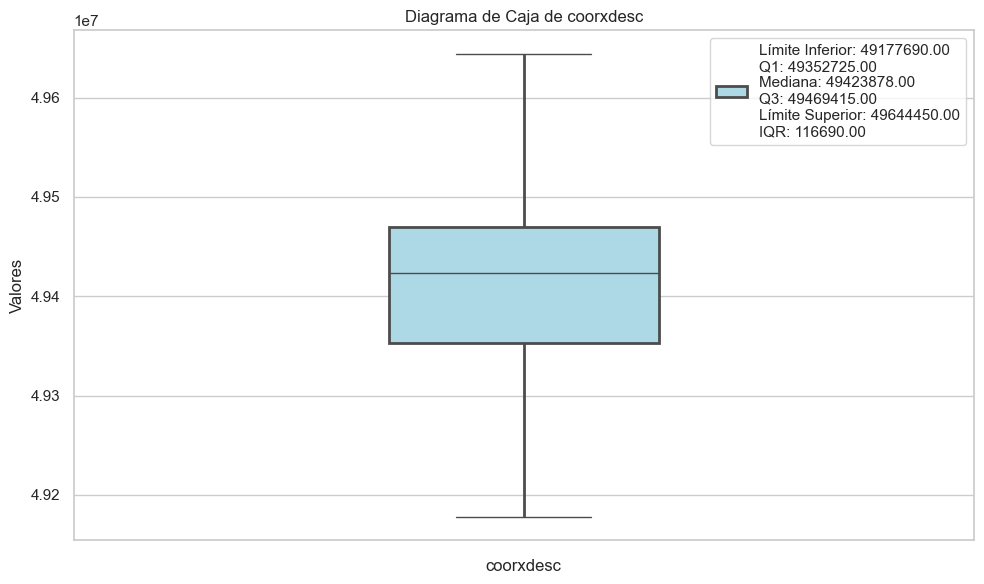

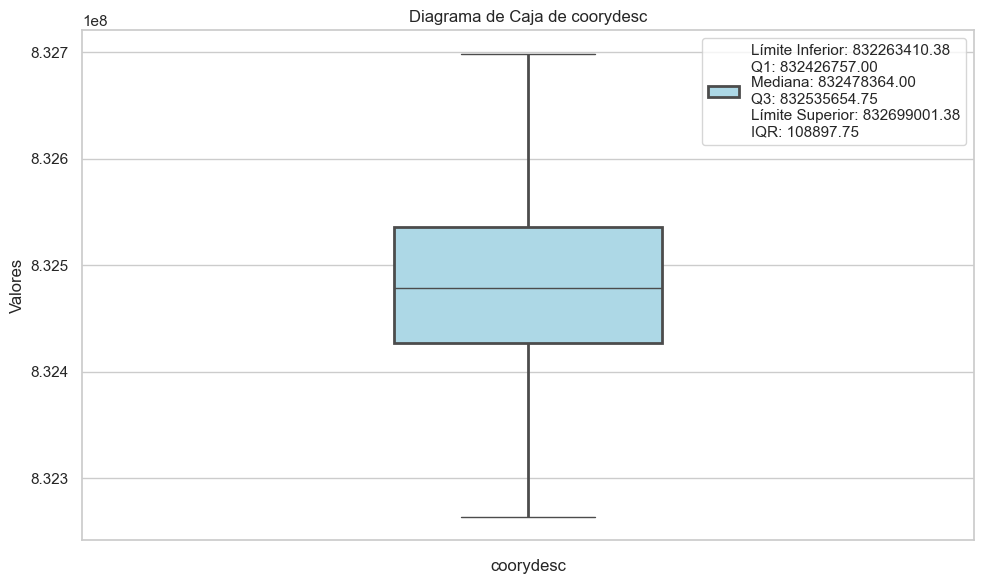

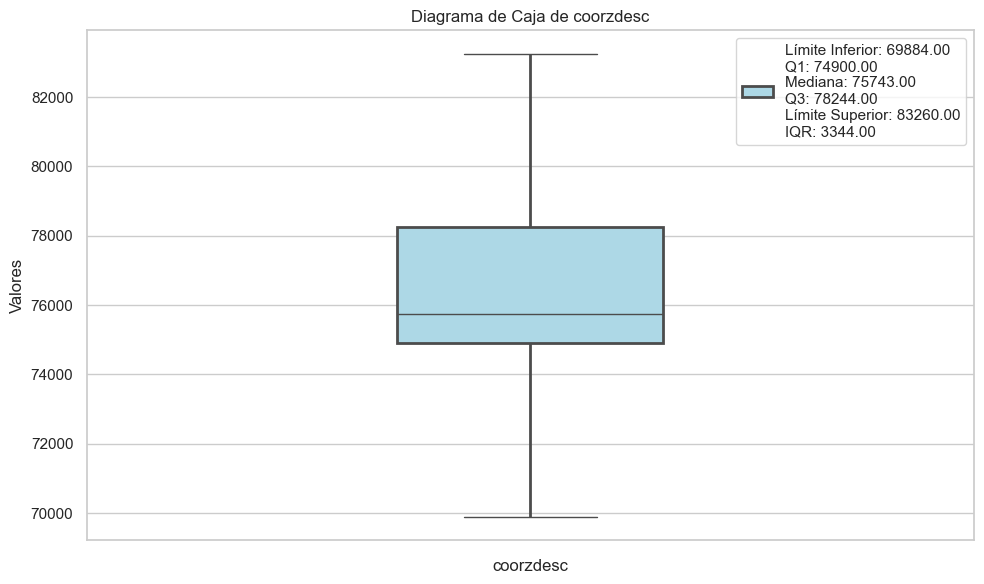

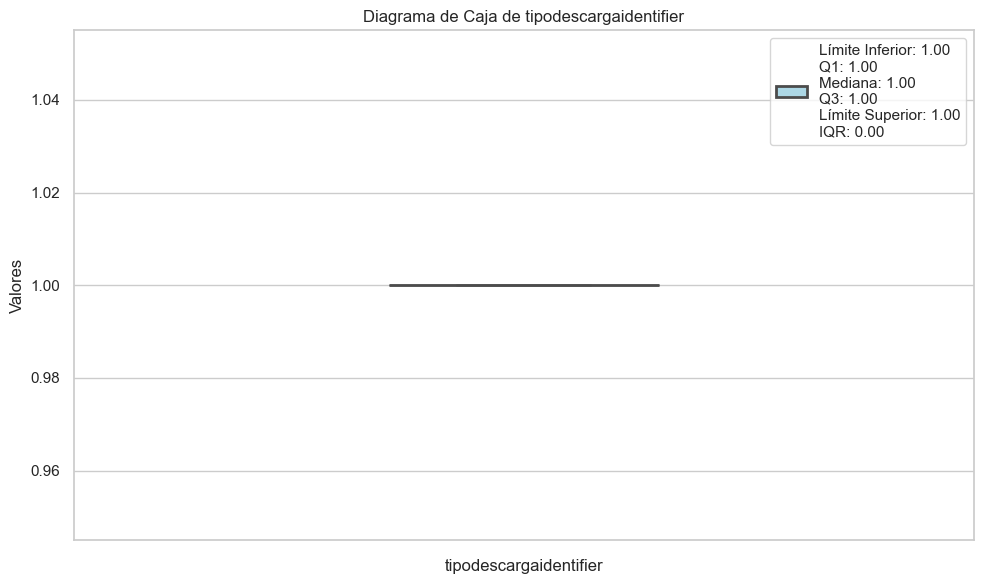

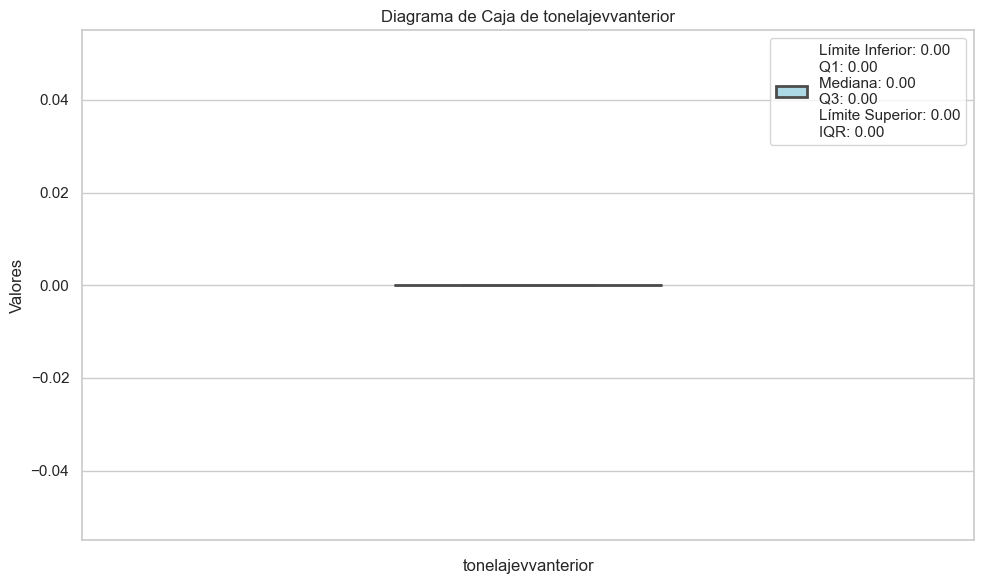

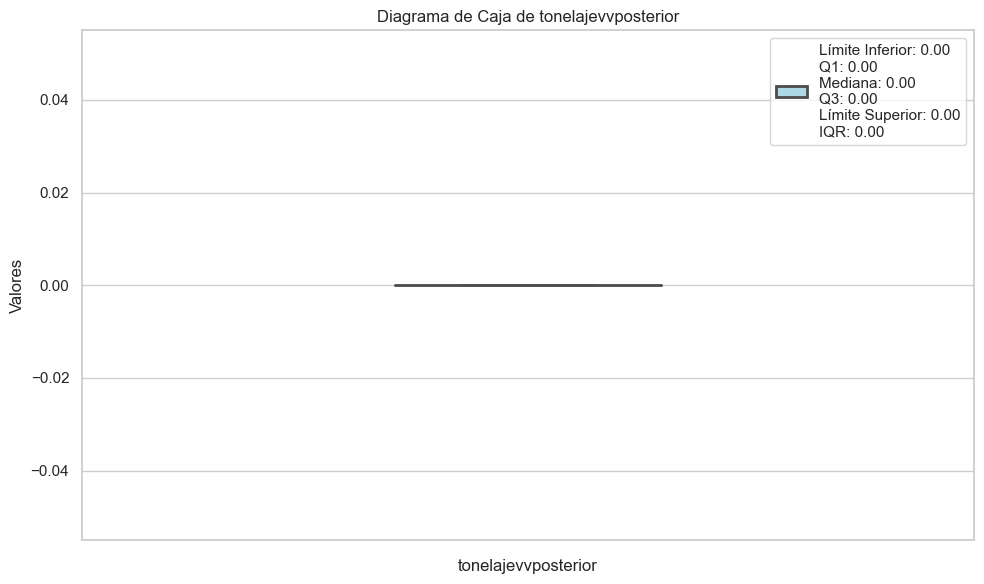

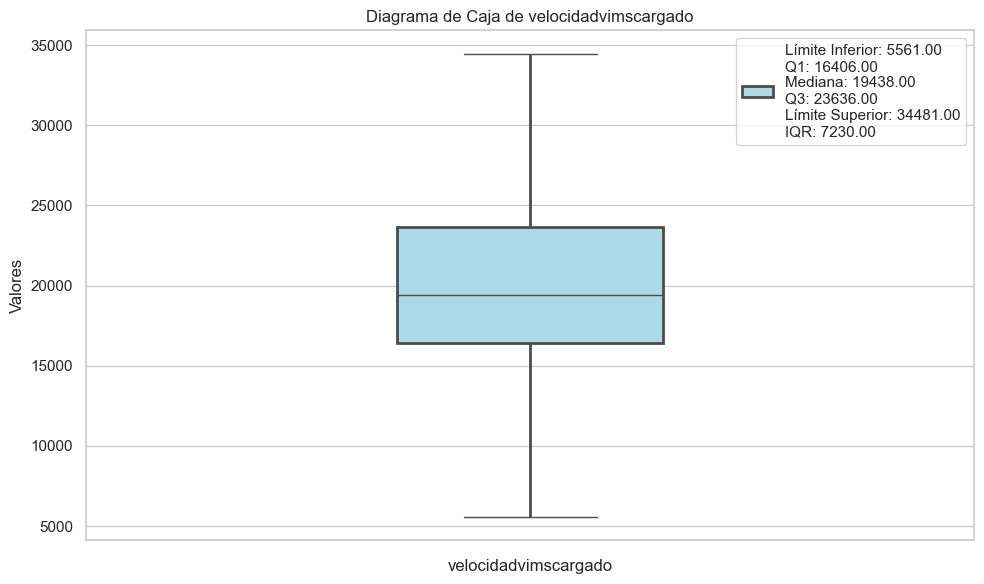

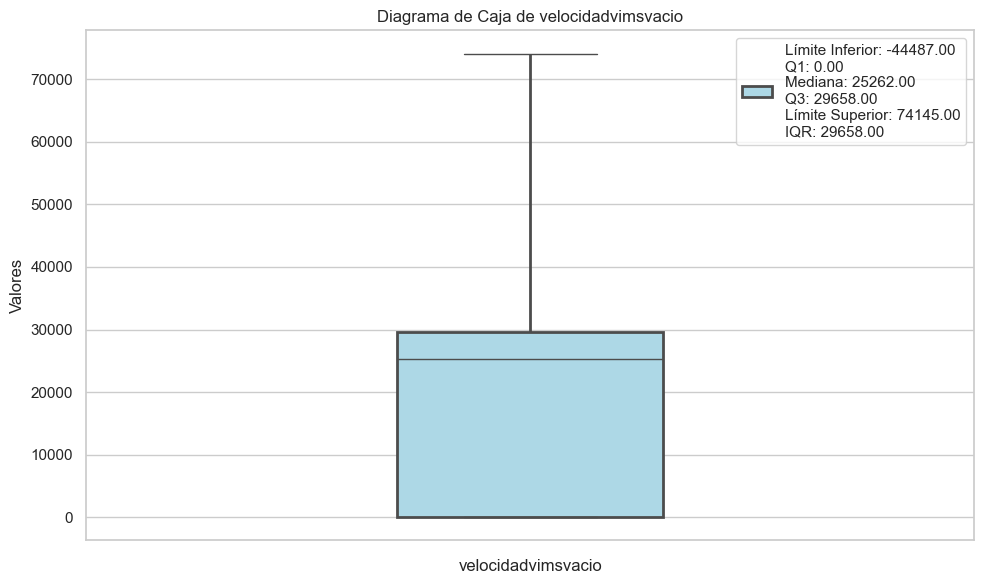

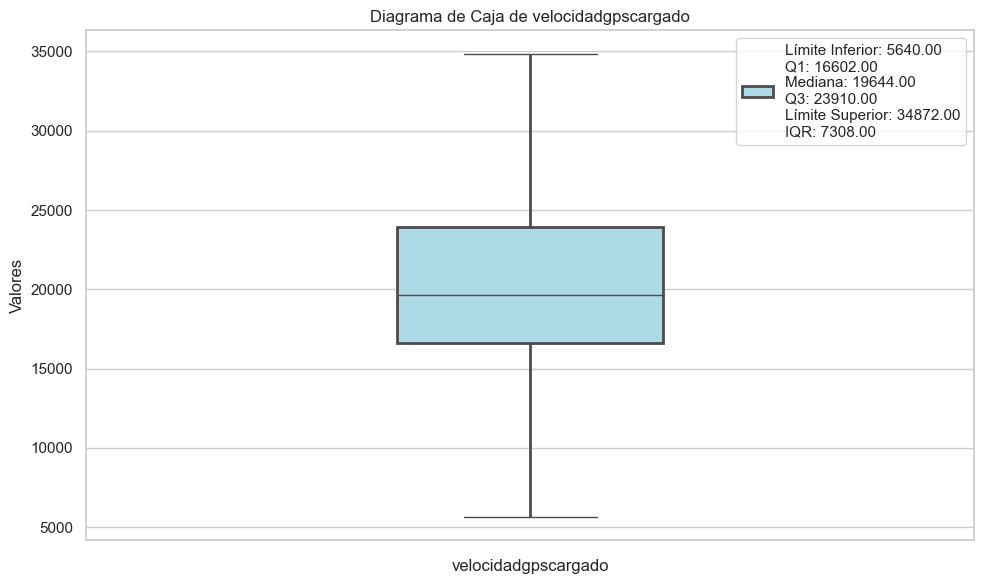

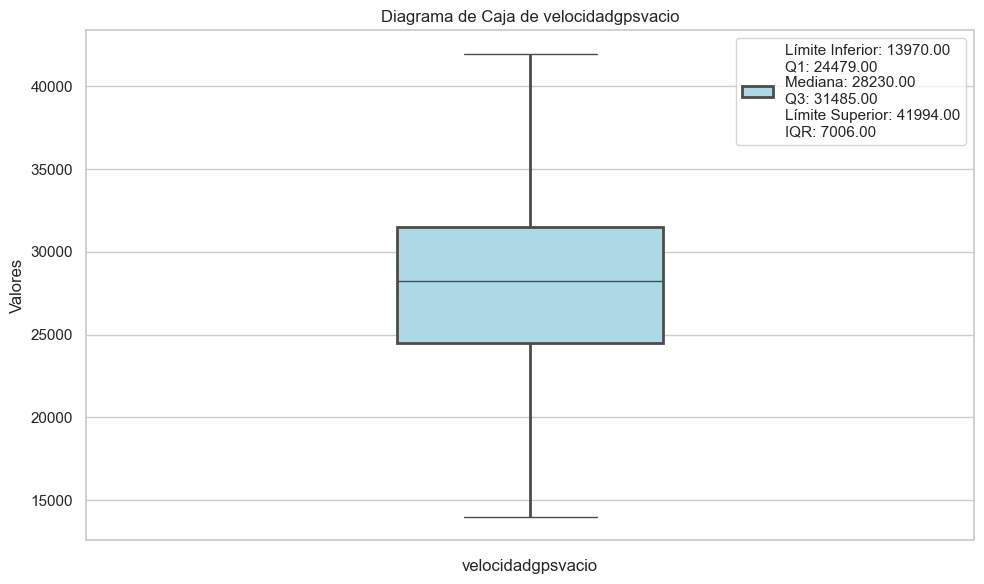

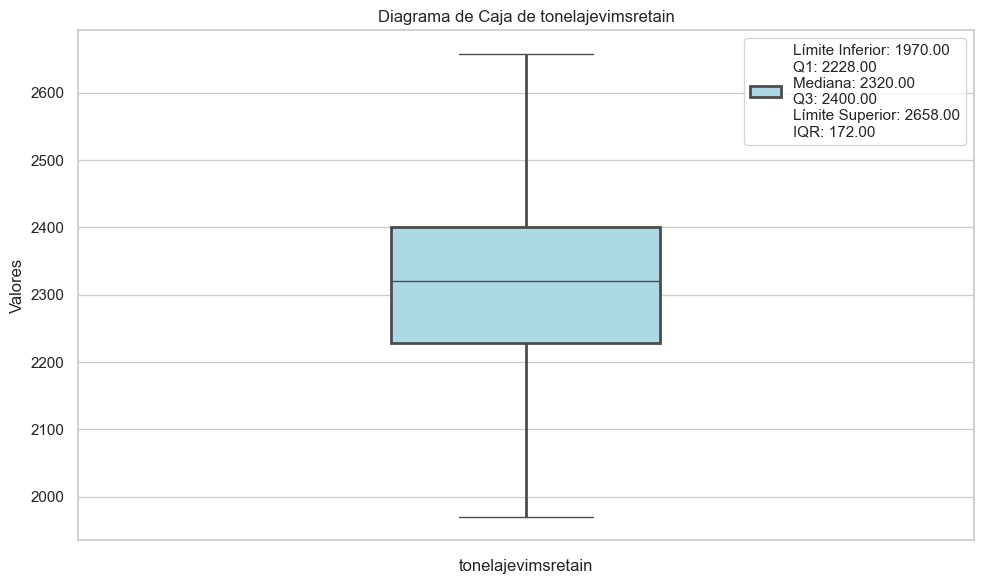

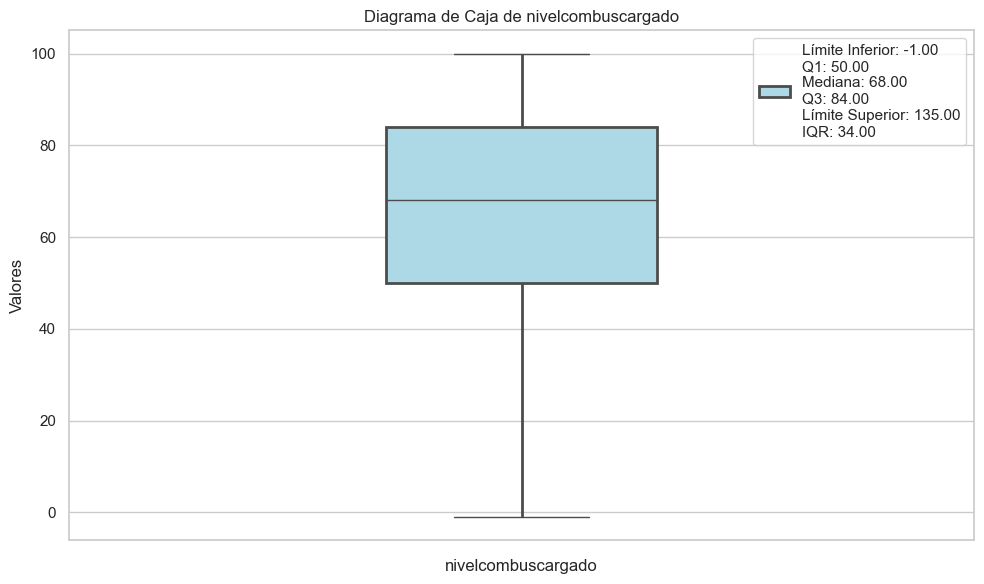

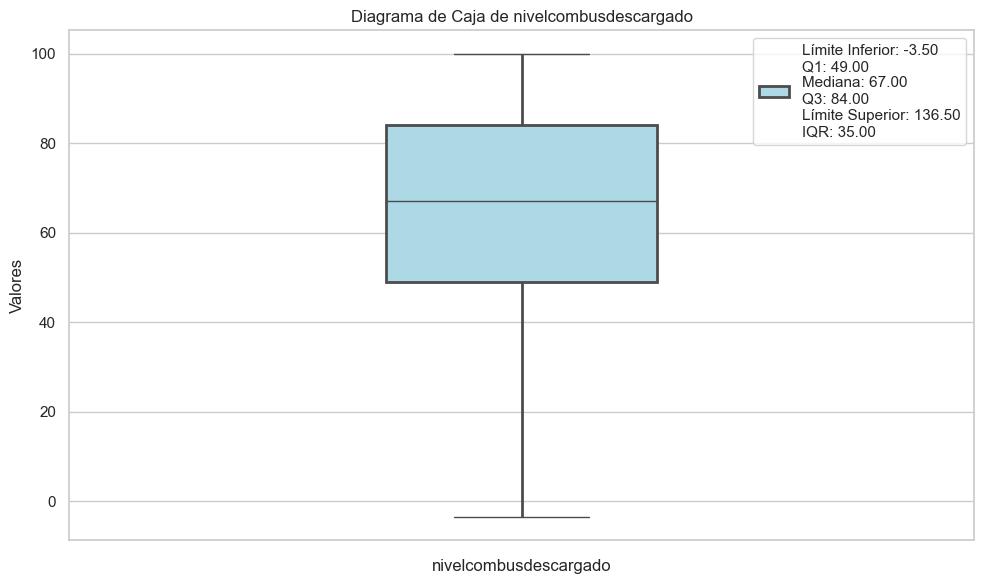

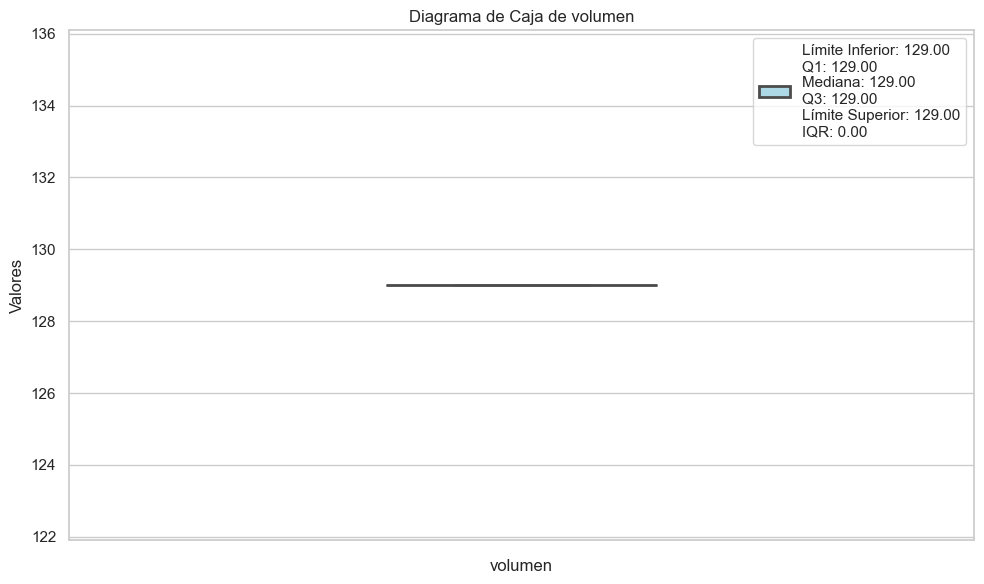

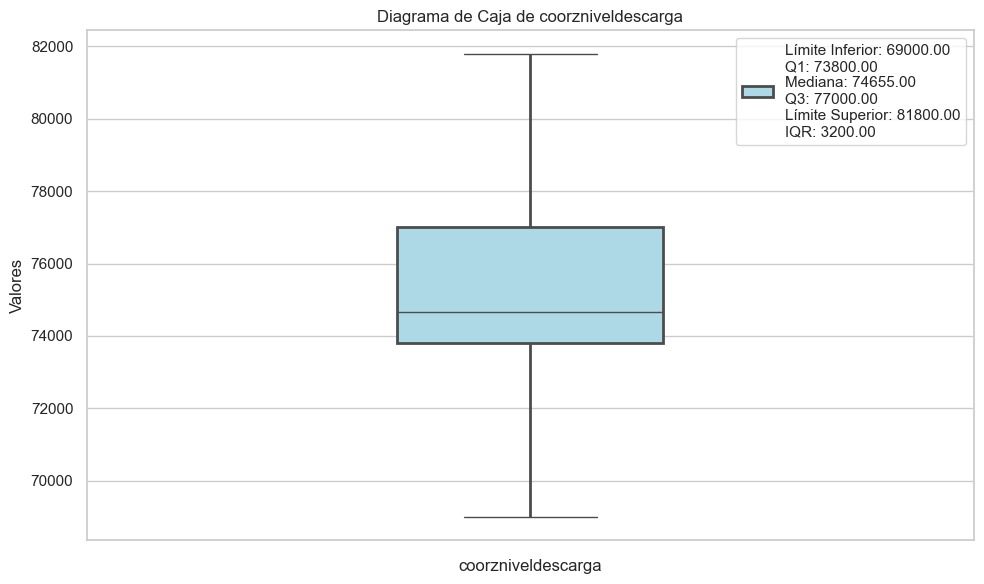

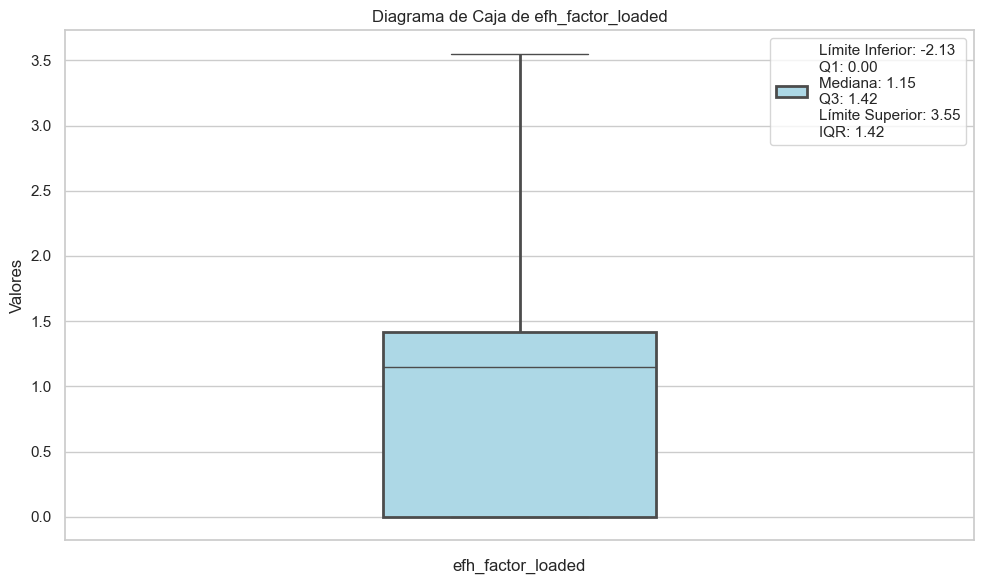

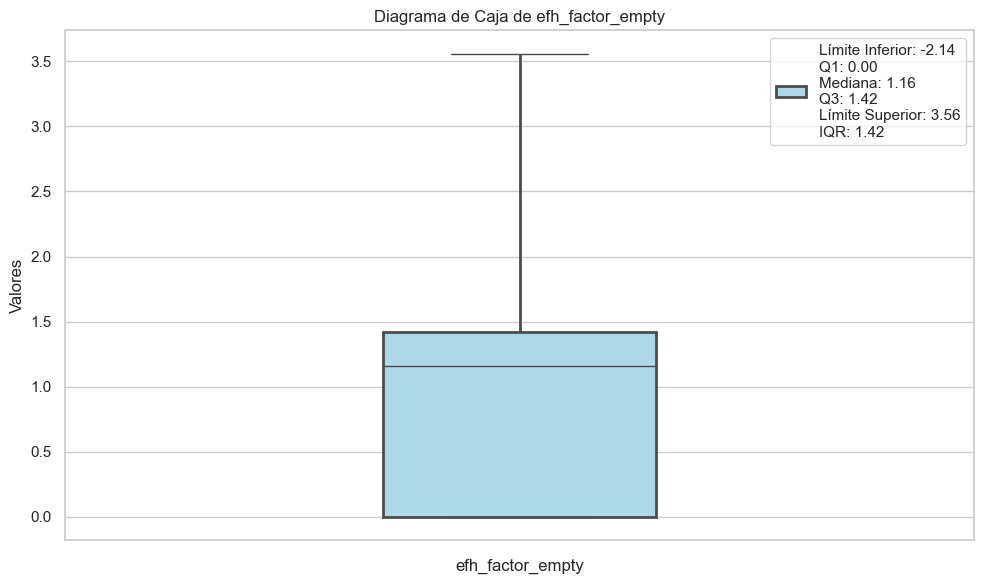

In [27]:

# Identificar las columnas numéricas y categóricas
columnas_numericas = datos.select_dtypes(include=['int', 'float']).columns

# Excluir las columnas que comienzan con 'id'
columnas_a_excluir = [col for col in datos.columns if col.startswith('id')]

# Filtrar las columnas numéricas que no están en columnas_a_excluir
columnas_a_incluir = [col for col in columnas_numericas if col not in columnas_a_excluir]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear diagramas de caja con bigotes como líneas y una leyenda
for columna in columnas_a_incluir:
    plt.figure(figsize=(10, 6))
    
    # Configurar el estilo de la caja y los bigotes
    boxprops = {'facecolor': 'lightblue', 'linewidth': 2}
    whiskerprops = {'linewidth': 2}
    
    sns.boxplot(data=datos, y=columna, boxprops=boxprops, whiskerprops=whiskerprops, width=0.3)
    
    plt.title(f'Diagrama de Caja de {columna}')
    plt.xlabel(columna)
    plt.ylabel("Valores")
    
    # Calcular estadísticas
    mediana = datos[columna].median()
    Q1 = datos[columna].quantile(0.25)
    Limite_inferior = datos[columna].quantile(0.25) - 1.5 * (datos[columna].quantile(0.75) - datos[columna].quantile(0.25))
    Q3 = datos[columna].quantile(0.75)
    Limite_superior = datos[columna].quantile(0.75) + 1.5 * (datos[columna].quantile(0.75) - datos[columna].quantile(0.25))
    IQR = Q3 - Q1
    
    # Crear la leyenda
    leyenda = f'Límite Inferior: {Limite_inferior:.2f}\nQ1: {Q1:.2f}\nMediana: {mediana:.2f}\nQ3: {Q3:.2f}\nLímite Superior: {Limite_superior:.2f}\nIQR: {IQR:.2f}'
    
    # Colocar la leyenda fuera del gráfico, en el lado derecho superior
    plt.legend([leyenda], loc='upper right', bbox_to_anchor=(1, 1))
    
    # Ajustar la disposición de elementos en el gráfico
    plt.tight_layout()
    
    plt.show()

Graficamos la matriz de correlacion, luego de haber hecho el tratamiento de Valores Atipicos (Metodo de Limitar a los limites superior e inferior)

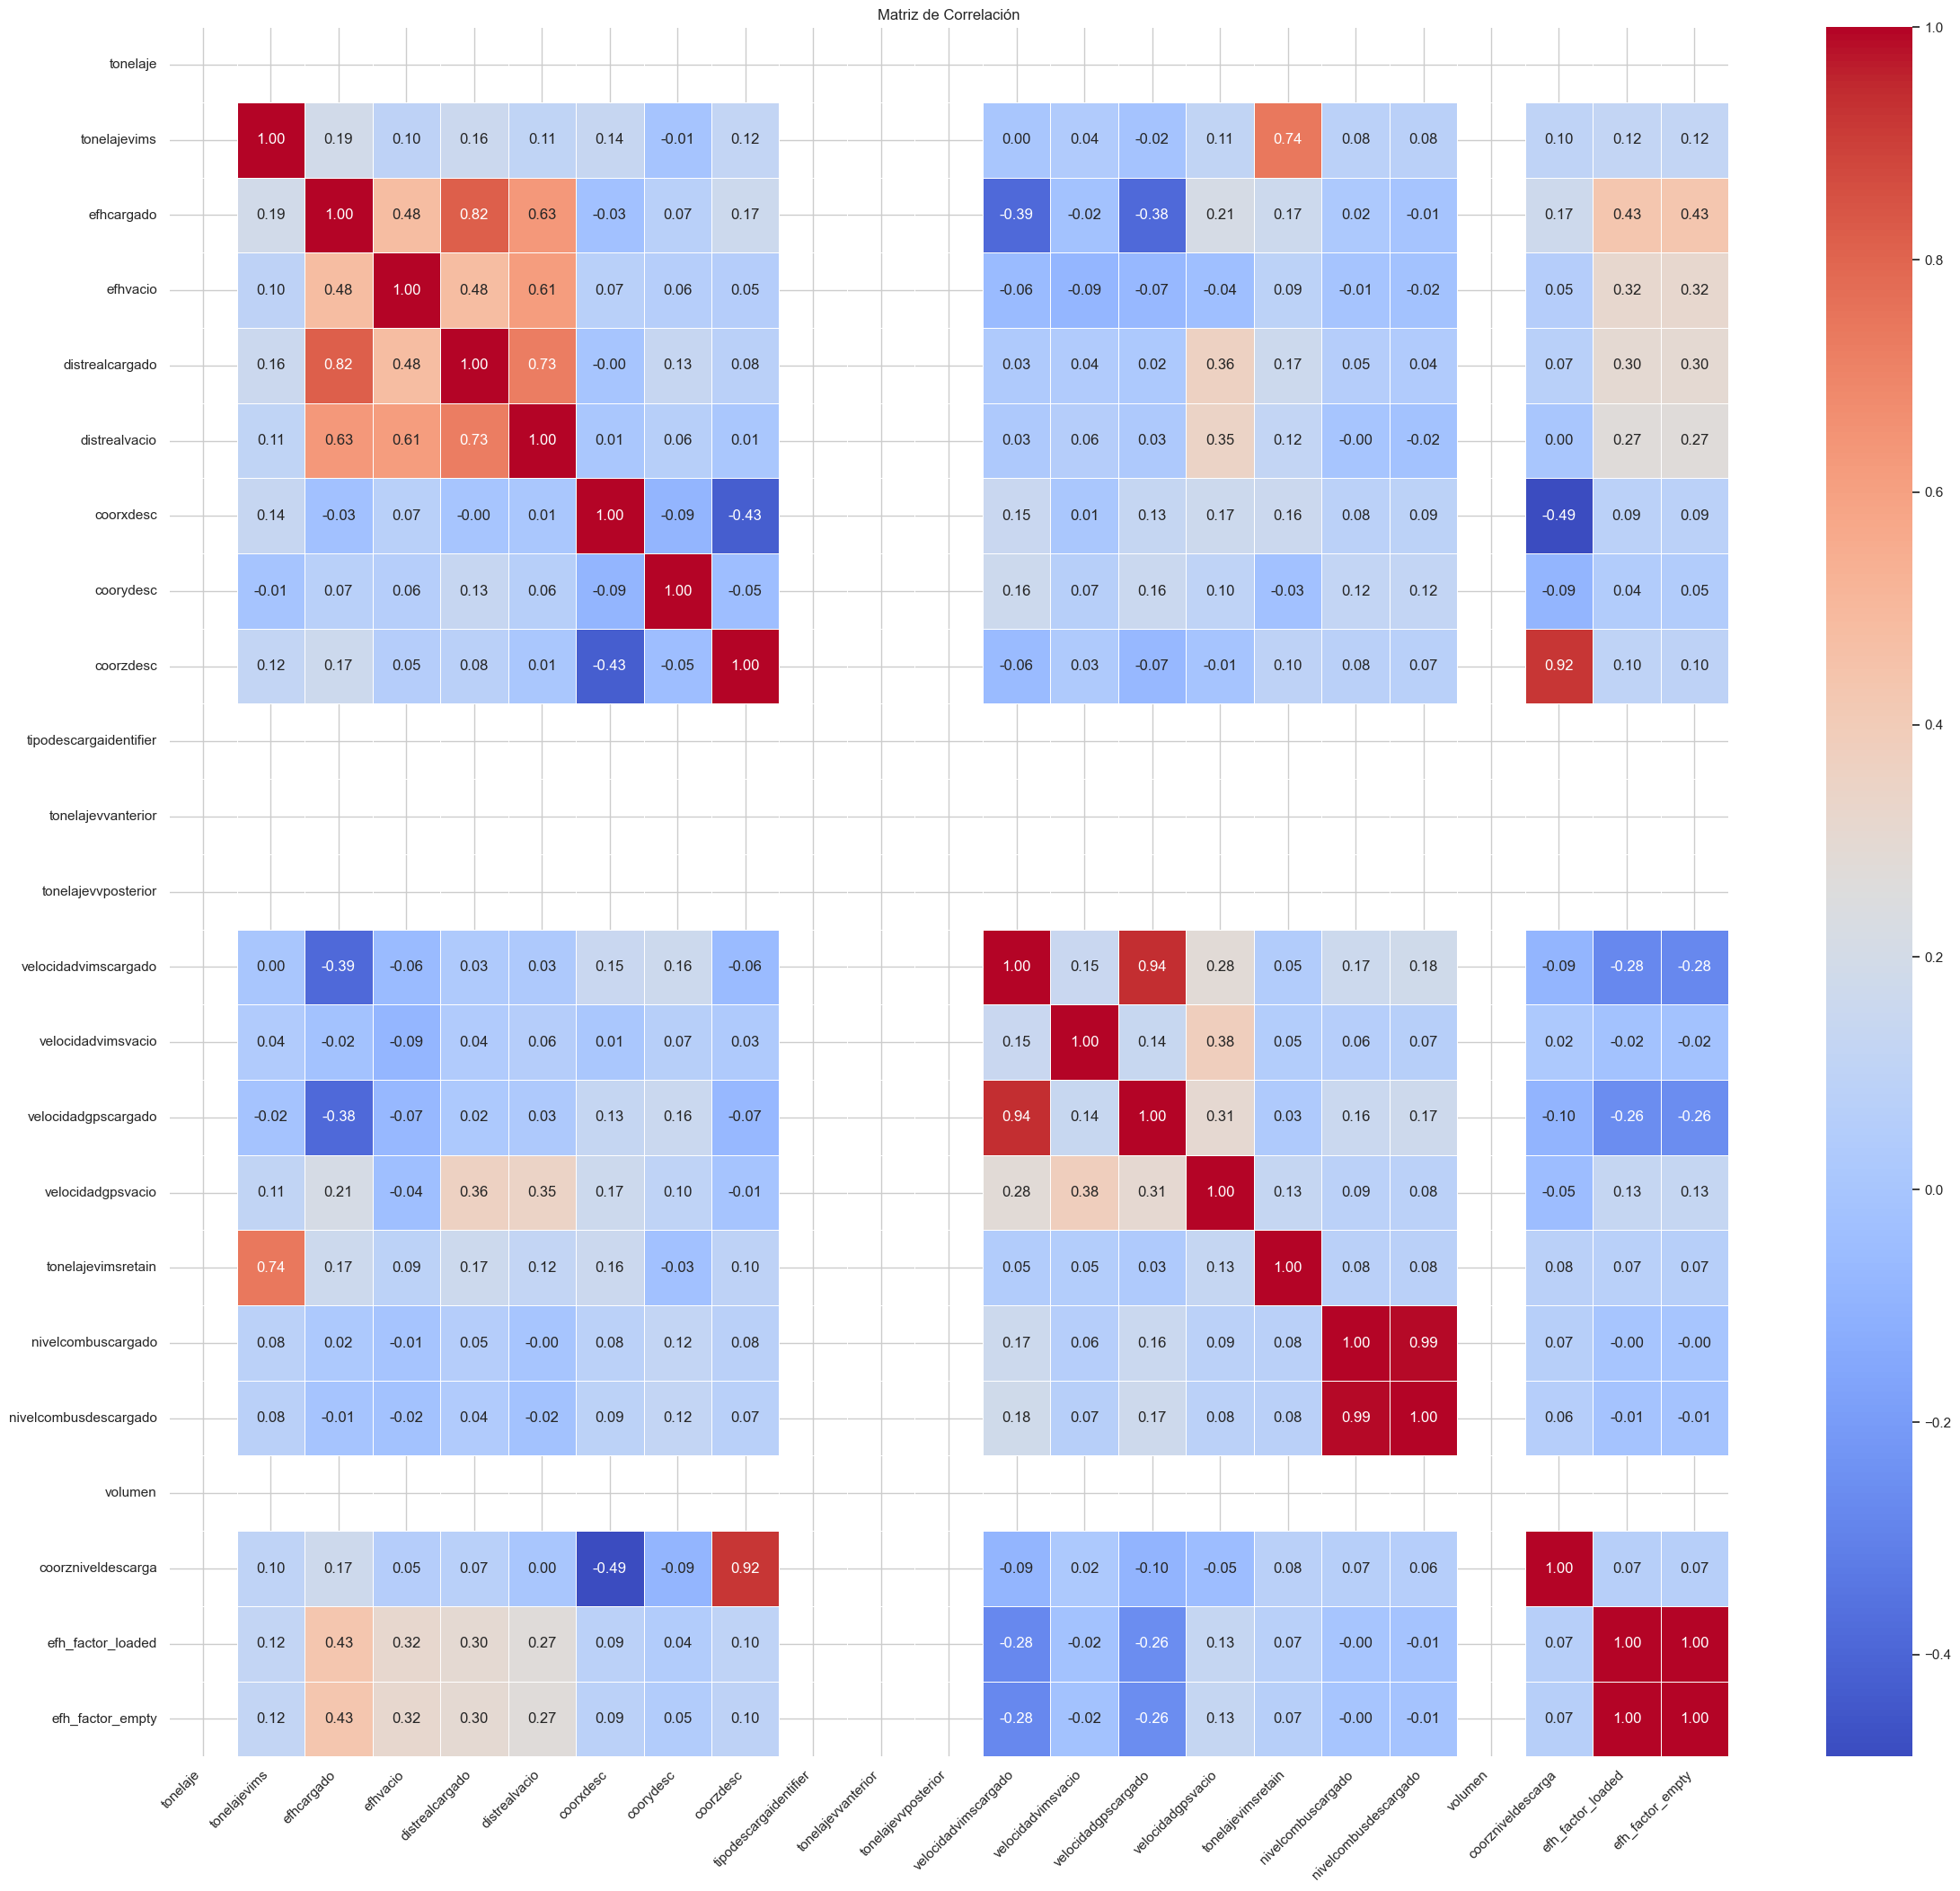

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'datos'

# Identificar las columnas numéricas
columnas_numericas = datos.select_dtypes(include=['int', 'float']).columns

# Excluir las columnas que comienzan con 'id'
columnas_numericas = [col for col in columnas_numericas if not col.startswith('id')]

# Crear una matriz de correlación
matriz_correlacion = datos[columnas_numericas].corr()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Aumentar el tamaño del gráfico para mostrar más detalles
plt.figure(figsize=(28, 25))

# Crear un mapa de calor (heatmap) de la matriz de correlación con desplazamiento habilitado
ax = sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)

# Agregar etiquetas a los ejes X e Y
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

plt.title("Matriz de Correlación")
plt.show()

<span style="color: yellow;">*Apartir de aplicar el tratamiento de los valores atipicos(Outliers), se concluye que en el analisis de la presente tabla "public.tp_cargadescarga (Ciclo Acarreo)"
no es adecuado hacer el tratamiento de valores atipicos, porque los valores atipicos que se presentan nos generan informacion valiosa para los posteriores analisis.*</span>

### 1.11 *DIAGRAMAS DE DISPERSION* 
- Identificar las variables: Cada punto en el gráfico representa una observación que contiene valores para ambas variables que se están comparando.
- Evaluar la fuerza de la relación: Cuanto más cerca estén los puntos de una línea recta, más fuerte será la relación. Si los puntos están más dispersos, la relación será más débil.
- Identificar patrones: Buscamos patrones en el gráfico, como líneas rectas, curvas, grupos de puntos o cualquier otro patrón que indique una relación entre las variables.

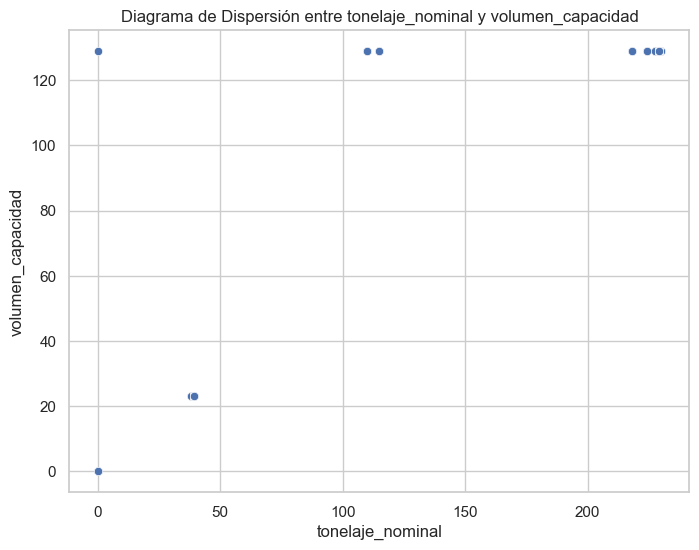

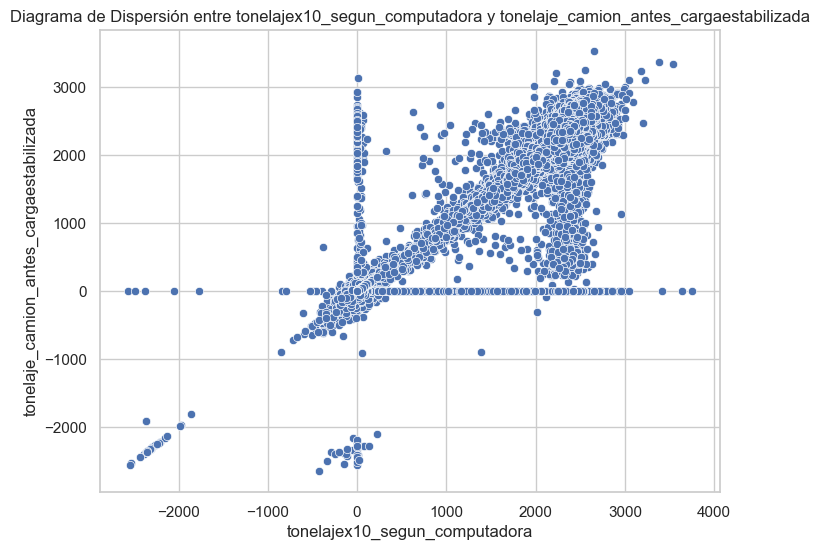

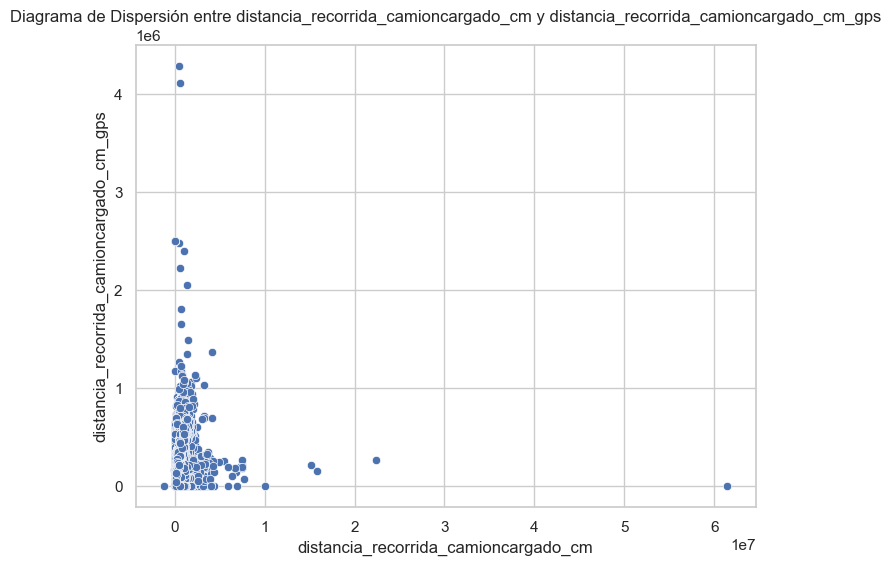

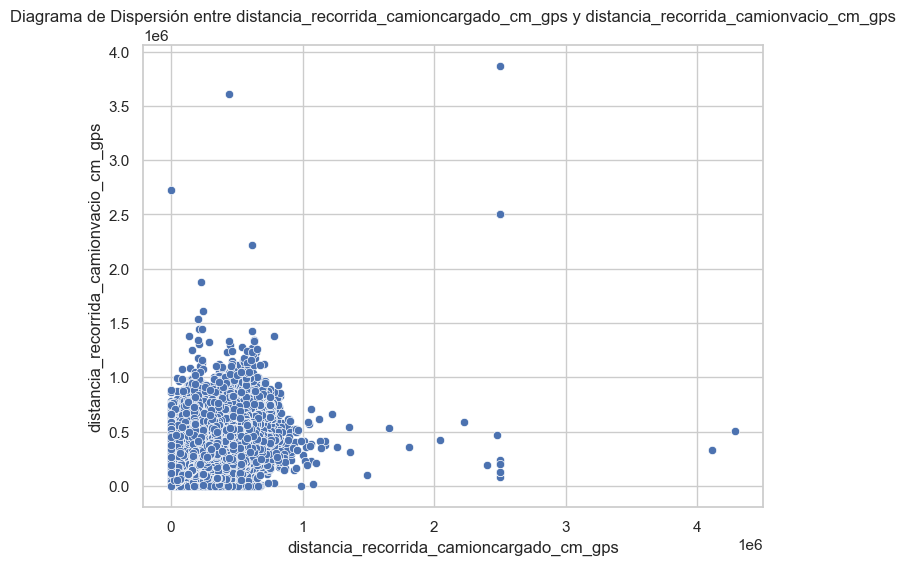

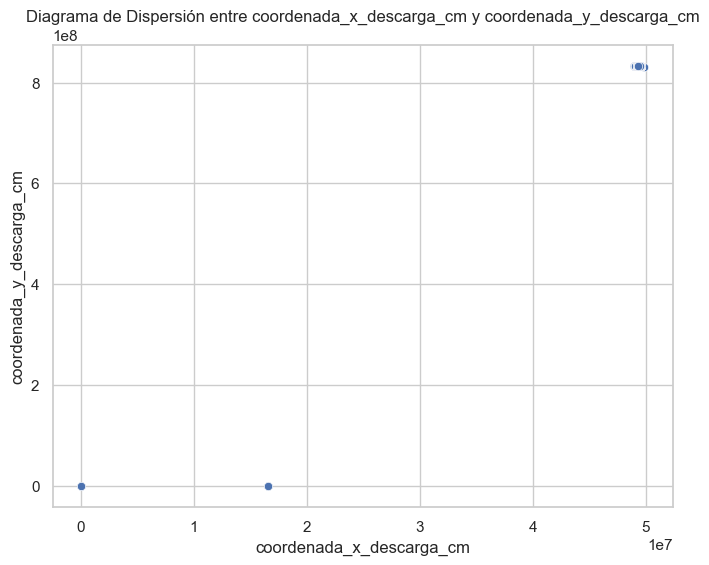

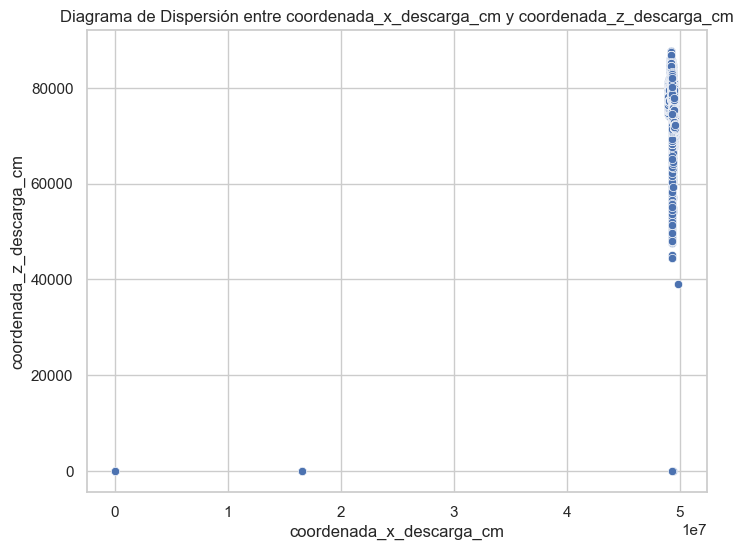

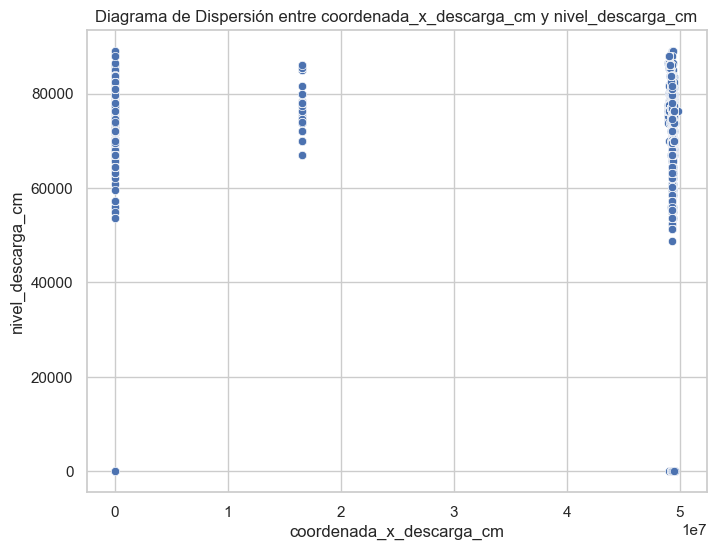

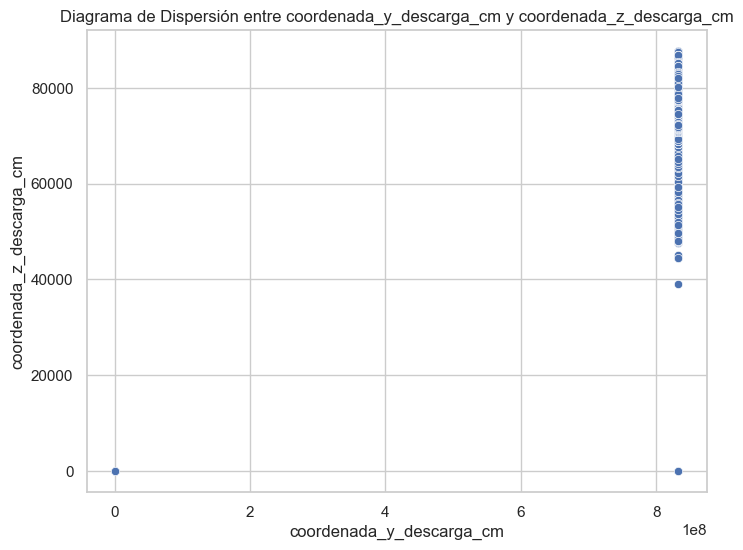

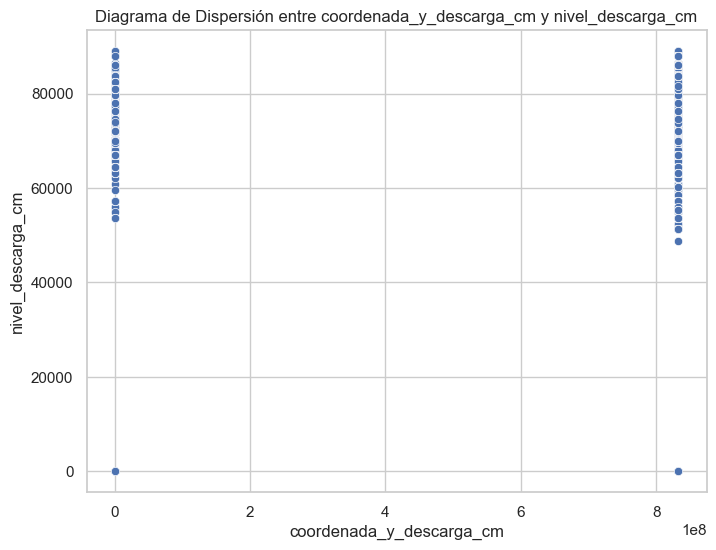

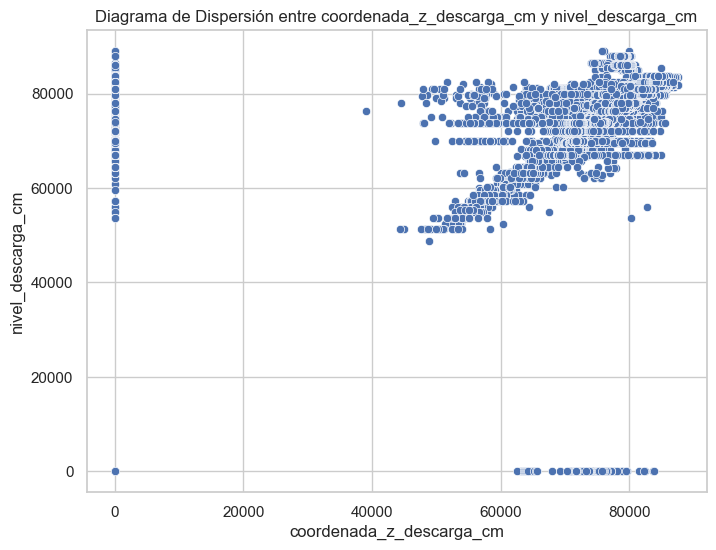

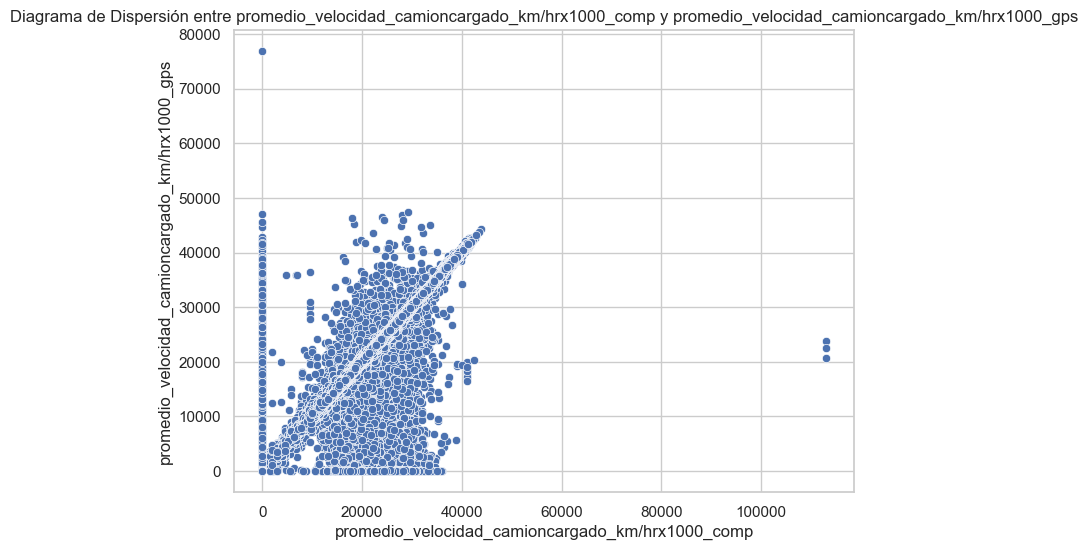

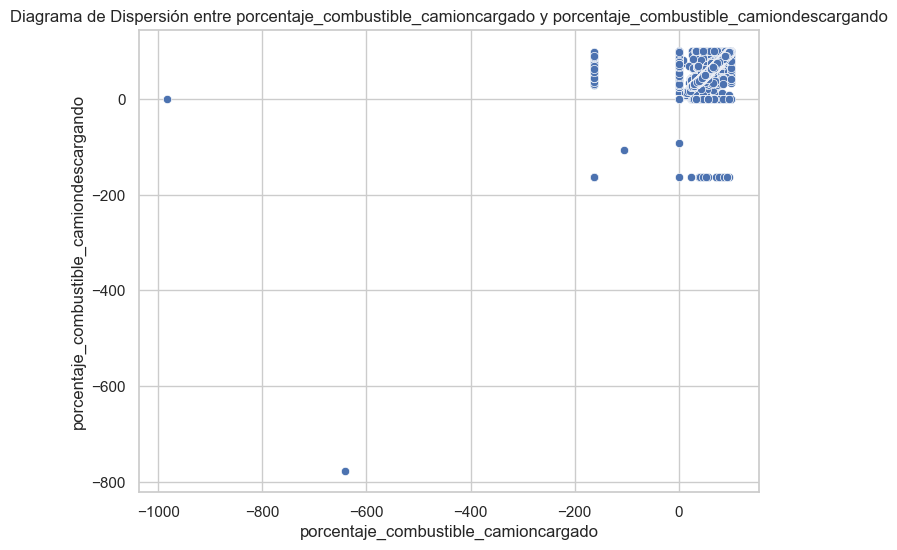

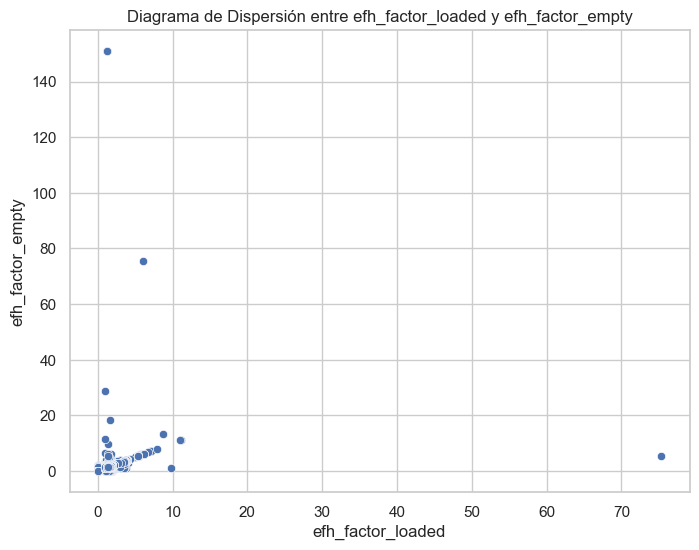

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'datos'

# Identificar las columnas numéricas y categóricas
columnas_numericas = datos.select_dtypes(include=['int', 'float']).columns

# Excluir las columnas que comienzan con 'id'
columnas_a_excluir = [col for col in datos.columns if col.startswith('id')]

# Filtrar las columnas numéricas que no están en columnas_a_excluir
columnas_a_incluir = [col for col in columnas_numericas if col not in columnas_a_excluir]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Definir un umbral de correlación (ajusta según tus necesidades)
umbral_correlacion = 0.7

# Crear diagramas de dispersión solo para pares con correlación superior al umbral
for i in range(len(columnas_a_incluir)):
    for j in range(i+1, len(columnas_a_incluir)):
        col1 = columnas_a_incluir[i]
        col2 = columnas_a_incluir[j]
        
        correlacion = datos[col1].corr(datos[col2])
        
        if abs(correlacion) >= umbral_correlacion:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=datos, x=col1, y=col2)
            plt.title(f'Diagrama de Dispersión entre {col1} y {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

### *1.12 Seleccion de Variables con Analisis Estadistico*

***1. Seleccion Basada en Analisis de Varianza***

In [27]:
import pandas as pd

# Identificar las columnas numéricas y categóricas
columnas_numericas = datos.select_dtypes(include=['int', 'float']).columns

# Excluir las columnas que comienzan con 'id'
columnas_a_excluir = [col for col in datos.columns if col.startswith('id')]

# Filtrar las columnas numéricas que no están en columnas_a_excluir
columnas_a_incluir = [col for col in columnas_numericas if col not in columnas_a_excluir]

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
datos_filtrados = datos[columnas_a_incluir]

# Calcular la desviación estándar de cada variable
desviaciones_estandar = datos_filtrados.std()

# Crear un DataFrame con los resultados y restablecer el índice
resultados = pd.DataFrame({'Variable': desviaciones_estandar.index, 'Desviación Estándar': desviaciones_estandar}).reset_index(drop=True)

# Ordenar el DataFrame por desviación estándar en orden descendente
resultados = resultados.sort_values(by='Desviación Estándar', ascending=False)

# Imprimir las variables y sus desviaciones estándar
print(resultados)

                                            Variable  Desviación Estándar
7                           coordenada_y_descarga_cm     104946538.470874
3                 distancia_recorrida_camionvacio_cm      88975708.560333
6                           coordenada_x_descarga_cm       6194564.760189
2               distancia_recorrida_camioncargado_cm        211567.310243
5             distancia_recorrida_camionvacio_cm_gps        109424.922826
4           distancia_recorrida_camioncargado_cm_gps        108133.857673
13    promedio_velocidad_camionvacio_km/hrx1000_comp         13519.797056
8                           coordenada_z_descarga_cm         10053.219704
20                                 nivel_descarga_cm          8130.667543
15     promedio_velocidad_camionvacio_km/hrx1000_gps          7798.648111
12  promedio_velocidad_camioncargado_km/hrx1000_comp          5848.017878
14   promedio_velocidad_camioncargado_km/hrx1000_gps          5767.730006
16           tonelaje_camion_antes_car